In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import statsmodels.api as sm
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import plotly.express as px

url = '../processed_data/output.csv'

df = pd.read_csv(url)
df.tail()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


country  year     sex          age  suicides  population  \
12788  Ukraine  2015  female  35-54 years       427     6309963   
12789  Ukraine  2015  female  15-24 years       117     2281055   
12790  Ukraine  2015  female  25-34 years       168     3421535   
12791  Ukraine  2015    male   5-14 years        33     2131084   
12792  Ukraine  2015  female   5-14 years        19     2010824   

       sucid_in_hundredk country-year    yearly_gdp  gdp_per_capita  ...  \
12788               6.77  Ukraine2015  9.103096e+10            2256  ...   
12789               5.13  Ukraine2015  9.103096e+10            2256  ...   
12790               4.91  Ukraine2015  9.103096e+10            2256  ...   
12791               1.55  Ukraine2015  9.103096e+10            2256  ...   
12792               0.94  Ukraine2015  9.103096e+10            2256  ...   

      physician_price  laborforcetotal  lifeexpectancy  mobilesubscriptions  \
12788        1.817658     1.077831e+07       50.156848            44.867006   
12789        1.817658     1.077831e+07       50.156848            44.867006   
12790        1.817658     1.077831e+07       50.156848            44.867006   
12791        1.817658     1.077831e+07       50.156848            44.867006   
12792        1.817658     1.077831e+07       50.156848            44.867006   

           refugees  selfemployed  electricityacess  continent  country_code  \
12788  10732.386792      2.157578         64.426681     Europe           UKR   
12789  10732.386792      2.157578         64.426681     Europe           UKR   
12790  10732.386792      2.157578         64.426681     Europe           UKR   
12791  10732.386792      2.157578         64.426681     Europe           UKR   
12792  10732.386792      2.157578         64.426681     Europe           UKR   

       mobilesubscription  
12788                 0.0  
12789                 0.0  
12790                 0.0  
12791                 0.0  
12792                 0.0  

[5 rows x 26 columns]

In [3]:
# Create the bar plot

fig = px.bar(df,x='year',y='suicides',color='continent',title='Suicides by Continent',)

# Show the plot
fig.show()

In [4]:
df.head()

country  year     sex          age  suicides  population  \
0  Argentina  1985    male    75+ years       202      363000   
1  Argentina  1985    male  55-74 years       485     1997000   
2  Argentina  1985    male  35-54 years       414     3346300   
3  Argentina  1985  female  55-74 years       210     2304000   
4  Argentina  1985    male  25-34 years       177     2234200   

   sucid_in_hundredk   country-year    yearly_gdp  gdp_per_capita  ...  \
0              55.65  Argentina1985  8.841667e+10            3264  ...   
1              24.29  Argentina1985  8.841667e+10            3264  ...   
2              12.37  Argentina1985  8.841667e+10            3264  ...   
3               9.11  Argentina1985  8.841667e+10            3264  ...   
4               7.92  Argentina1985  8.841667e+10            3264  ...   

  physician_price  laborforcetotal  lifeexpectancy  mobilesubscriptions  \
0        1.817658     1.077831e+07       50.156848            44.867006   
1        1.817658     1.077831e+07       50.156848            44.867006   
2        1.817658     1.077831e+07       50.156848            44.867006   
3        1.817658     1.077831e+07       50.156848            44.867006   
4        1.817658     1.077831e+07       50.156848            44.867006   

       refugees  selfemployed  electricityacess  continent  country_code  \
0  10732.386792      2.157578         64.426681   Americas           ARG   
1  10732.386792      2.157578         64.426681   Americas           ARG   
2  10732.386792      2.157578         64.426681   Americas           ARG   
3  10732.386792      2.157578         64.426681   Americas           ARG   
4  10732.386792      2.157578         64.426681   Americas           ARG   

   mobilesubscription  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 0.0  

[5 rows x 26 columns]

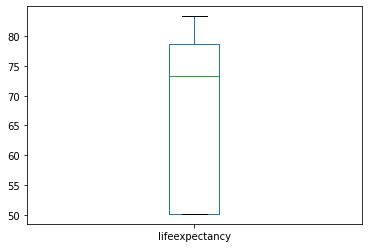

In [5]:
# define function called plot_box
def plot_box(df, ft):
    df.boxplot(column=[ft])
    plt.grid(False)
    plt.show()


# plot the diagram
plot_box(df, "lifeexpectancy")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12793 entries, 0 to 12792
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   country               12793 non-null  object 
 1   year                  12793 non-null  int64  
 2   sex                   12793 non-null  object 
 3   age                   12793 non-null  object 
 4   suicides              12793 non-null  int64  
 5   population            12793 non-null  int64  
 6   sucid_in_hundredk     12793 non-null  float64
 7   country-year          12793 non-null  object 
 8   yearly_gdp            12793 non-null  float64
 9   gdp_per_capita        12793 non-null  int64  
 10  generation            12793 non-null  object 
 11  suicide%              12793 non-null  float64
 12  internetusers         12793 non-null  float64
 13  expenses              12793 non-null  float64
 14  employeecompensation  12793 non-null  float64
 15  unemployment       

In [10]:
## Animation frame

#create coloured region map by lifeExp
fig= px.choropleth(df,               
              locations="country_code", color="gdp_per_capita",
              hover_name="country",  
              animation_frame="year")
fig.show()

In [8]:
## Animation frame

#create coloured region map by Suicide
fig= px.choropleth(df,               
              locations="country_code", color="suicides",
              hover_name="country",  
              animation_frame="year")
fig.show()

In [11]:
dff=df.groupby(["country"], as_index=False)[["sucid_in_hundredk","gdp_per_capita"]].mean()

scatterplot = px.scatter(
        data_frame=dff,
        x="sucid_in_hundredk",
        y="gdp_per_capita",
        hover_data=['country'],
        text="country",
        height=540, labels={
                     "sucid_in_hundredk": "Suicide per hundred thousand",
                     "gdp_per_capita": "GDP Per capita",})
scatterplot.show()

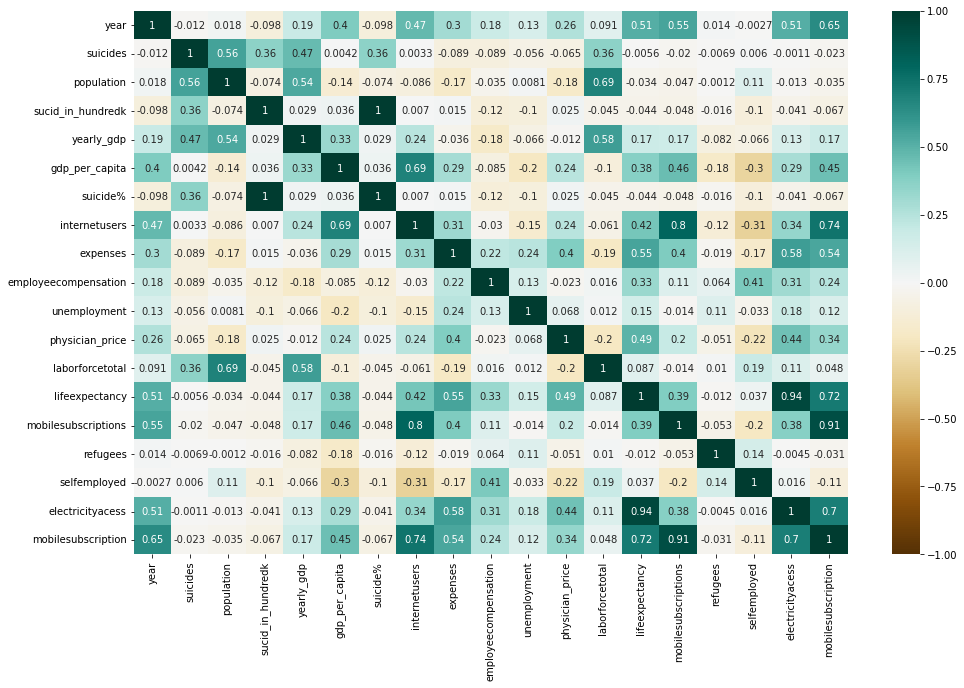

In [12]:
correlations = df.corr()
plt.figure(figsize=(16, 10))
sns.heatmap(correlations, center=0, annot=True, vmin=-1, vmax=1, cmap="BrBG")
plt.show()

Text(0.5, 0, 'Suicides per 100K')

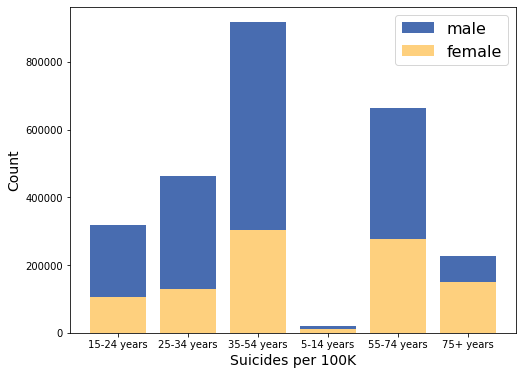

In [13]:
col = plt.cm.Spectral(np.linspace(0, 1, 20))

plt.figure(figsize=(8, 6))

agedistf = pd.DataFrame(df.groupby('sex').get_group('female').groupby('age').suicides.sum())

agedistm = pd.DataFrame(df.groupby('sex').get_group('male').groupby('age').suicides.sum())

plt.bar(agedistm.index, agedistm.suicides, color=col[18])
plt.bar(agedistf.index, agedistf.suicides, color=col[7])
plt.legend(['male', 'female'], fontsize=16)
plt.ylabel('Count', fontsize=14)
plt.xlabel('Suicides per 100K', fontsize=14)

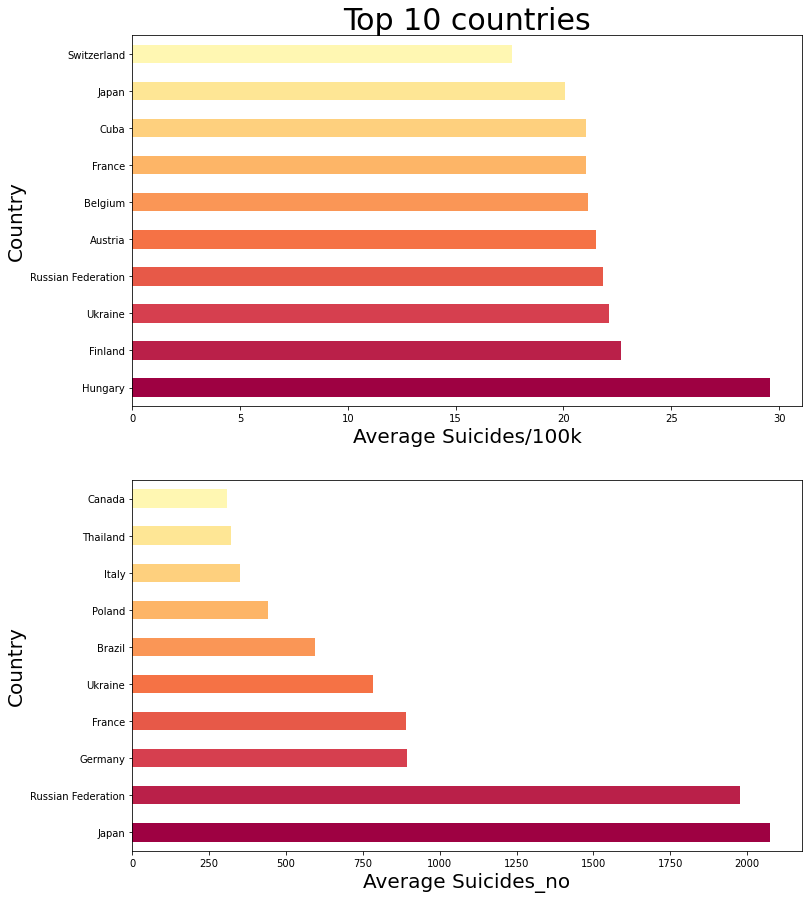

In [14]:
plt.figure(figsize=(12, 15))

col = plt.cm.Spectral(np.linspace(0, 1, 20))
plt.subplot(211)
df.groupby(['country']).sucid_in_hundredk.mean().nlargest(10).plot(kind='barh', color=col)
plt.xlabel('Average Suicides/100k', size=20)
plt.ylabel('Country', fontsize=20)
plt.title('Top 10 countries', fontsize=30)

plt.subplot(212)
df.groupby(['country']).suicides.mean().nlargest(10).plot(kind='barh', color=col)
plt.xlabel('Average Suicides_no', size=20)
plt.ylabel('Country', fontsize=20);

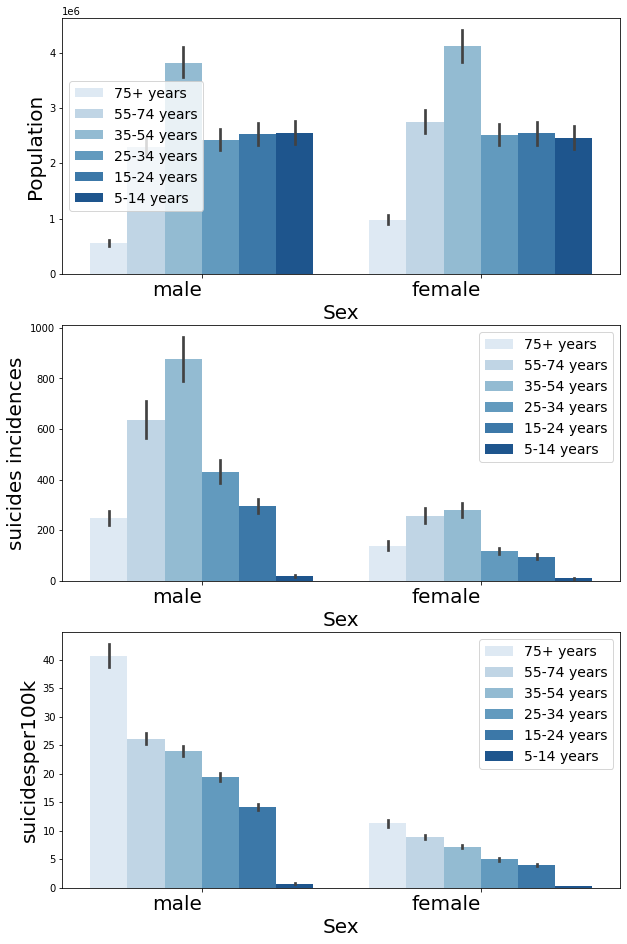

In [15]:
import seaborn as sns
plt.figure(figsize=(10, 16))

plt.subplot(311)

sns.barplot(x='sex', y='population', hue='age', data=df, palette="Blues")
plt.xticks(ha='right', fontsize=20)
plt.ylabel('Population', fontsize=20)
plt.xlabel('Sex', fontsize=20)
plt.legend(fontsize=14, loc='best')

plt.subplot(313)

sns.barplot(x='sex', y='sucid_in_hundredk', hue='age', data=df,palette="Blues")
plt.xticks(ha='right', fontsize=20);
plt.ylabel('suicidesper100k',fontsize=20);
plt.xlabel('Sex',fontsize=20);
plt.legend(fontsize=14);

plt.subplot(312)
sns.barplot(x='sex', y='suicides', hue='age', data=df, palette="Blues")
plt.xticks(ha='right', fontsize=20)
plt.ylabel('suicides incidences', fontsize=20)
plt.xlabel('Sex', fontsize=20)
plt.legend(fontsize=14)

Text(0, 0.5, 'Total number of suicides in the world')

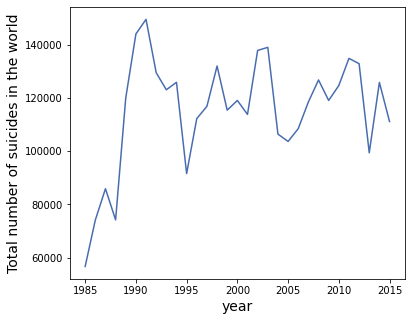

In [16]:
year = df.groupby('year').year.unique()

plt.figure(figsize=(6, 5))

totalpyear = pd.DataFrame(df.groupby('year').suicides.sum())

plt.plot(year.index[0:31], totalpyear[0:31], color=col[18])
plt.xlabel('year', fontsize=14)
plt.ylabel('Total number of suicides in the world', fontsize=14)

Text(0, 0.5, 'count')

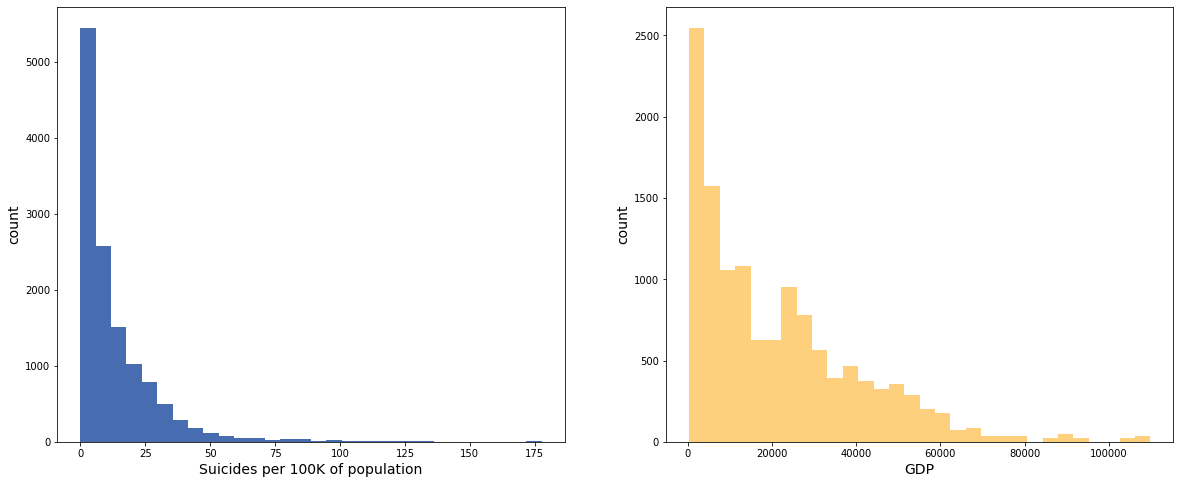

In [17]:
plt.figure(figsize=(20, 8))
plt.subplot(121)
plt.hist(df.sucid_in_hundredk, bins=30, color=col[18])
plt.xlabel('Suicides per 100K of population', fontsize=14)
plt.ylabel('count', fontsize=14)

plt.subplot(122)
plt.hist(df.gdp_per_capita, bins=30, color=col[7])
plt.xlabel('GDP', fontsize=14)
plt.ylabel('count', fontsize=14)

In [18]:
df.head()

country  year     sex          age  suicides  population  \
0  Argentina  1985    male    75+ years       202      363000   
1  Argentina  1985    male  55-74 years       485     1997000   
2  Argentina  1985    male  35-54 years       414     3346300   
3  Argentina  1985  female  55-74 years       210     2304000   
4  Argentina  1985    male  25-34 years       177     2234200   

   sucid_in_hundredk   country-year    yearly_gdp  gdp_per_capita  ...  \
0              55.65  Argentina1985  8.841667e+10            3264  ...   
1              24.29  Argentina1985  8.841667e+10            3264  ...   
2              12.37  Argentina1985  8.841667e+10            3264  ...   
3               9.11  Argentina1985  8.841667e+10            3264  ...   
4               7.92  Argentina1985  8.841667e+10            3264  ...   

  physician_price  laborforcetotal  lifeexpectancy  mobilesubscriptions  \
0        1.817658     1.077831e+07       50.156848            44.867006   
1        1.817658     1.077831e+07       50.156848            44.867006   
2        1.817658     1.077831e+07       50.156848            44.867006   
3        1.817658     1.077831e+07       50.156848            44.867006   
4        1.817658     1.077831e+07       50.156848            44.867006   

       refugees  selfemployed  electricityacess  continent  country_code  \
0  10732.386792      2.157578         64.426681   Americas           ARG   
1  10732.386792      2.157578         64.426681   Americas           ARG   
2  10732.386792      2.157578         64.426681   Americas           ARG   
3  10732.386792      2.157578         64.426681   Americas           ARG   
4  10732.386792      2.157578         64.426681   Americas           ARG   

   mobilesubscription  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 0.0  

[5 rows x 26 columns]

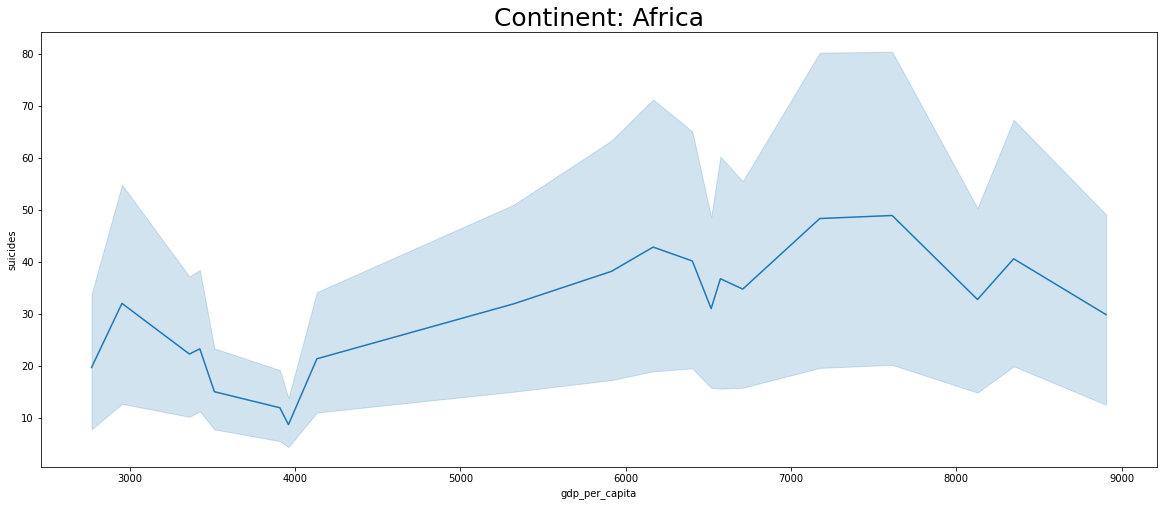

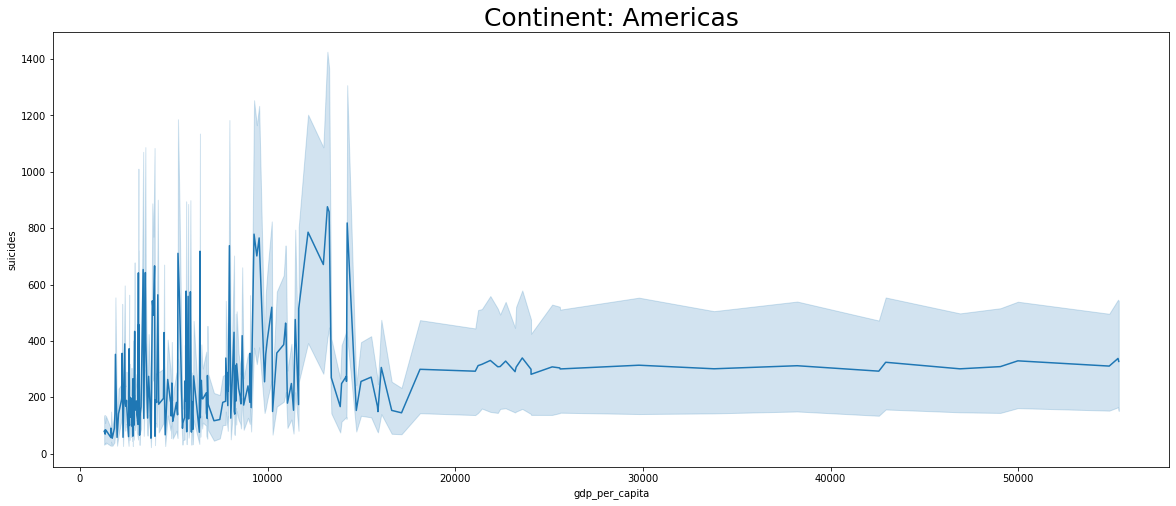

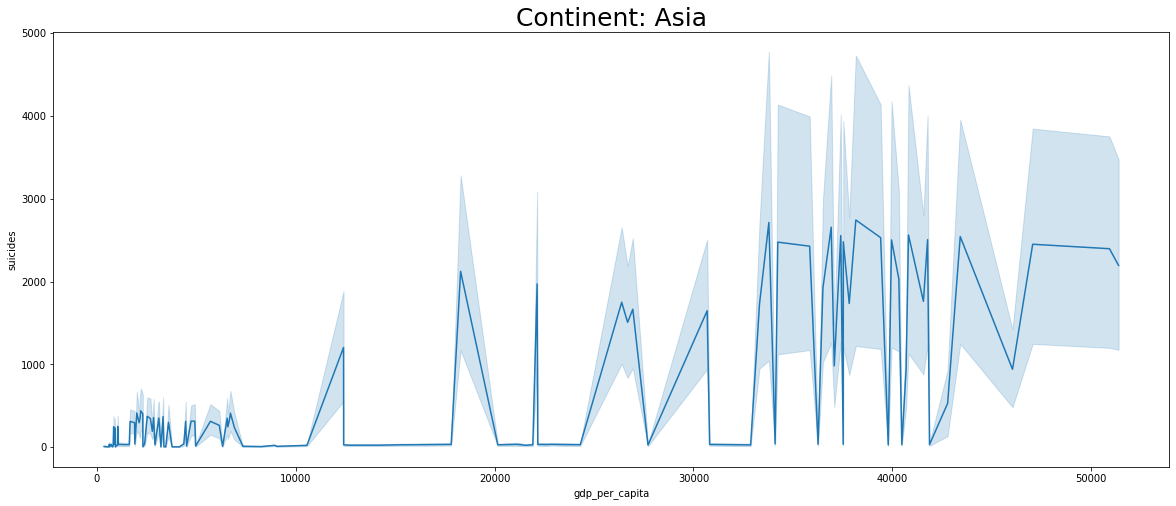

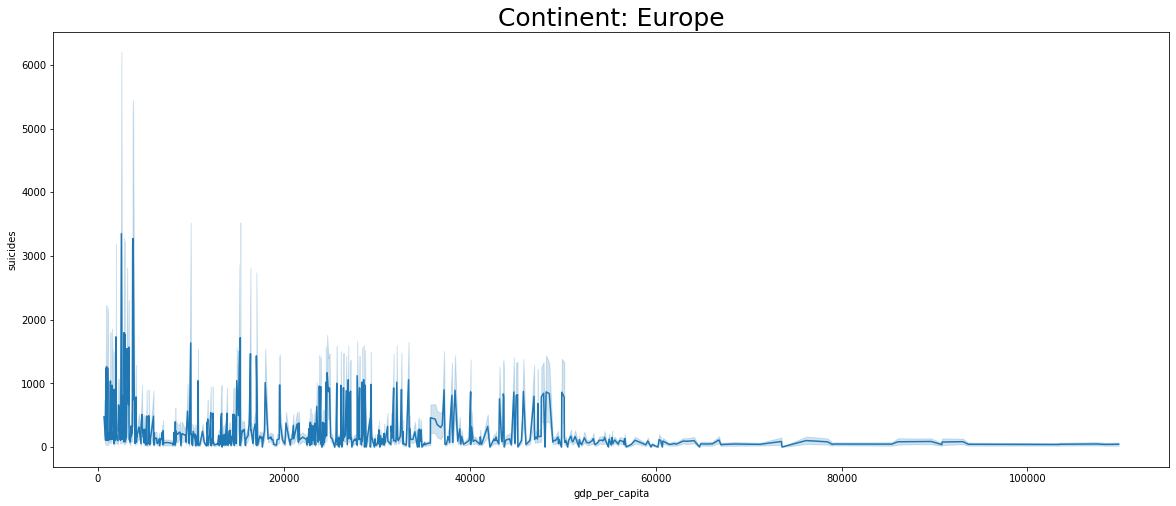

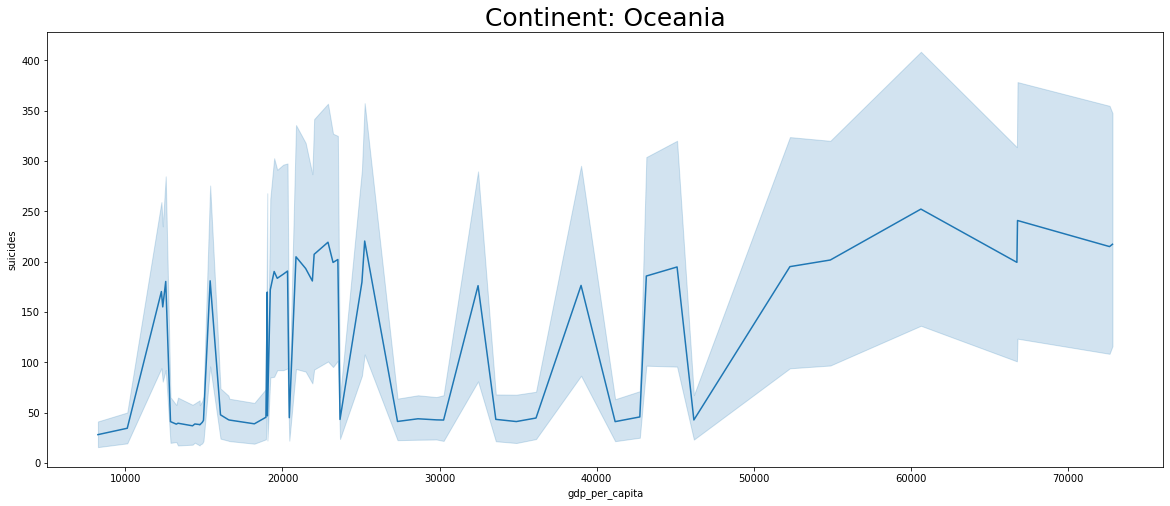

In [19]:
for continent in df.groupby("continent"):
  
  plt.figure(figsize=(20, 8))
  plt.title("Continent: "+ continent[0], fontsize = 25)
  sns.lineplot(x='gdp_per_capita', y='suicides', data=continent[1])

In [20]:
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides', 'population',
       'sucid_in_hundredk', 'country-year', 'yearly_gdp', 'gdp_per_capita',
       'generation', 'suicide%', 'internetusers', 'expenses',
       'employeecompensation', 'unemployment', 'physician_price',
       'laborforcetotal', 'lifeexpectancy', 'mobilesubscriptions', 'refugees',
       'selfemployed', 'electricityacess', 'continent', 'country_code',
       'mobilesubscription'],
      dtype='object')

In [21]:
countrynames = df['country'].unique()
countrynames

array(['Argentina', 'Armenia', 'Australia', 'Austria', 'Belgium',
       'Brazil', 'Bulgaria', 'Canada', 'Chile', 'Colombia', 'Croatia',
       'Cuba', 'Czech Republic', 'Denmark', 'Finland', 'France',
       'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Israel',
       'Italy', 'Japan', 'Mexico', 'Netherlands', 'New Zealand', 'Norway',
       'Poland', 'Portugal', 'Romania', 'Russian Federation',
       'South Africa', 'Spain', 'Sweden', 'Switzerland', 'Thailand',
       'Turkmenistan', 'Ukraine'], dtype=object)

In [22]:
features = ['country', 'year', 'sex', 'age', 'suicides', 'population',
       'sucid_in_hundredk', 'country-year', 'yearly_gdp', 'gdp_per_capita',
       'generation', 'internetusers']

total = df[features].groupby('country').get_group(countrynames[0]).groupby('year').mean()

total['suicides'] = df[['country', 'year', 'sucid_in_hundredk']].groupby('country').get_group(countrynames[0]).groupby('year').sum()
total['population'] = df[['country', 'year', 'population']].groupby('country').get_group(countrynames[0]).groupby('year').sum()

total['country'] = countrynames[0]

for i, x in enumerate(countrynames[1:]):
    suicides = df[features].groupby('country').get_group(x).groupby('year').mean()
    suicides['suicides'] = df[['country', 'year', 'sucid_in_hundredk']].groupby('country').get_group(x).groupby('year').sum()
    total['population'] = df[['country', 'year', 'population']].groupby('country').get_group(x).groupby('year').sum()
  
    suicides['country'] = x
    total = total.append(suicides)

total.reset_index(inplace=True)
sort = True

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 0, 'GDP')

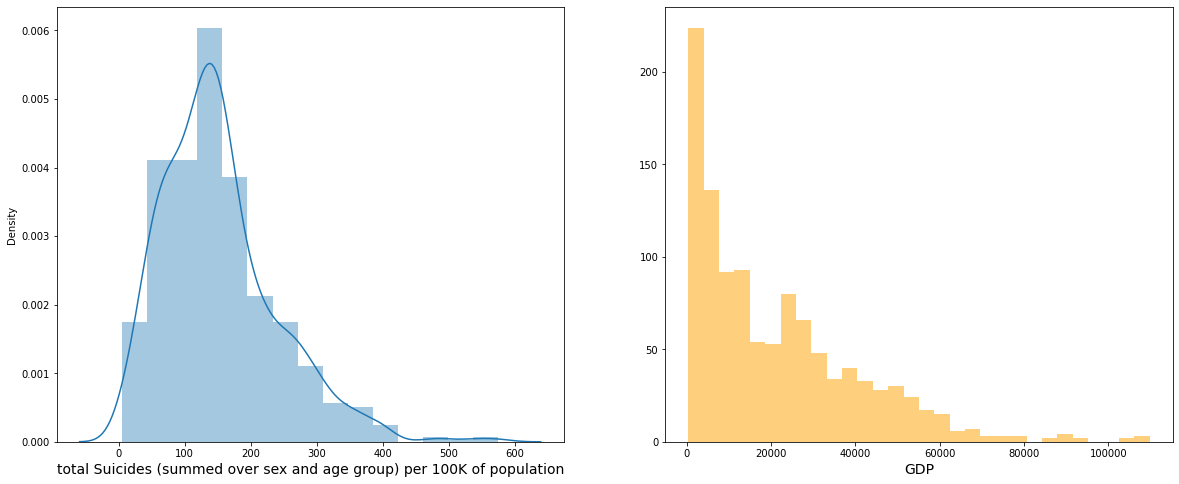

In [23]:
plt.figure(figsize=(20, 8))
plt.subplot(121)
sns.distplot(total.suicides, bins=15)
plt.xlabel('total Suicides (summed over sex and age group) per 100K of population', fontsize=14)

plt.subplot(122)
plt.hist(total.gdp_per_capita, bins=30, color=col[7])
plt.xlabel('GDP', fontsize=14)

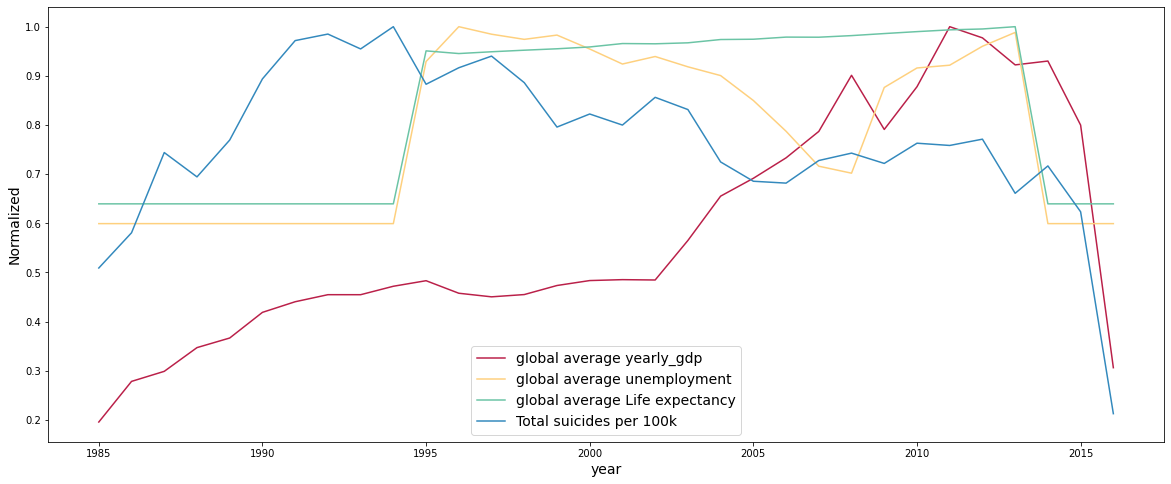

In [24]:
plt.figure(figsize=(20, 8))

suicides = df[['year', 'yearly_gdp', 'selfemployed', 'unemployment', 'lifeexpectancy']].groupby('year').mean()
suicides['suicides'] = df[['country', 'year', 'sucid_in_hundredk']].groupby('year').sum()

plt.plot(suicides.index, suicides.yearly_gdp/suicides.yearly_gdp.max(), color=col[1])
plt.plot(suicides.index, suicides.unemployment/suicides.unemployment.max(), color=col[7])
plt.plot(suicides.index, suicides.lifeexpectancy/suicides.lifeexpectancy.max(), color=col[15])
plt.plot(suicides.index, suicides.suicides/suicides.suicides.max(), color=col[17])
plt.legend(['global average yearly_gdp', 'global average unemployment', 'global average Life expectancy', 'Total suicides per 100k'], fontsize=14, loc='best')
plt.ylabel('Normalized', fontsize=14)
plt.xlabel('year', fontsize=14)
plt.show()

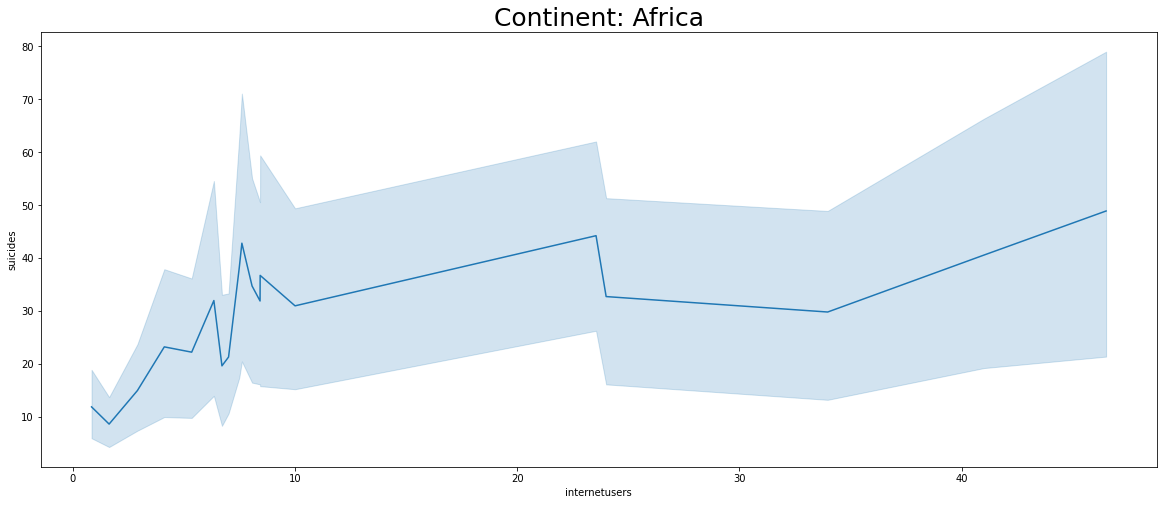

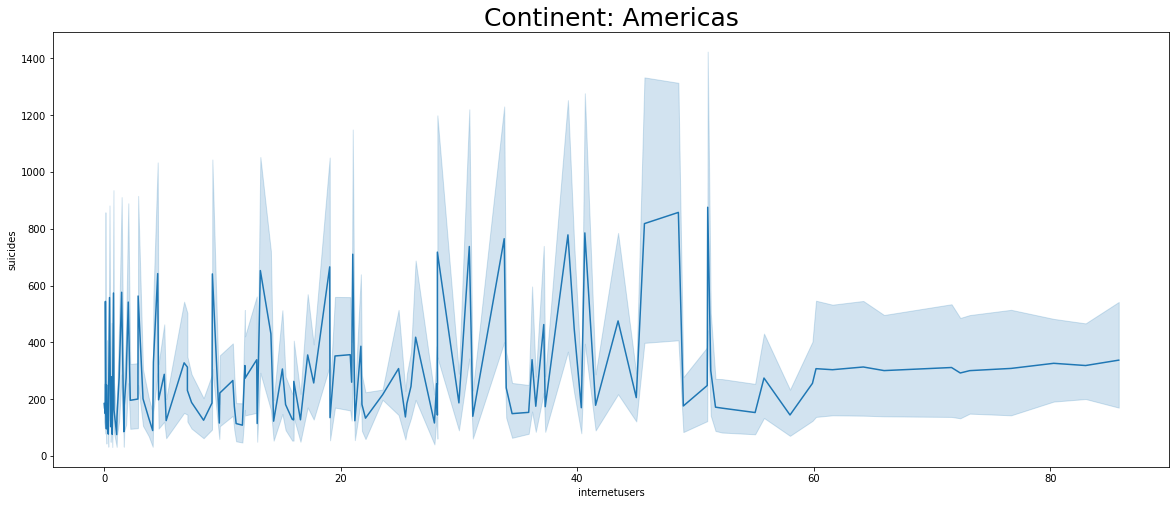

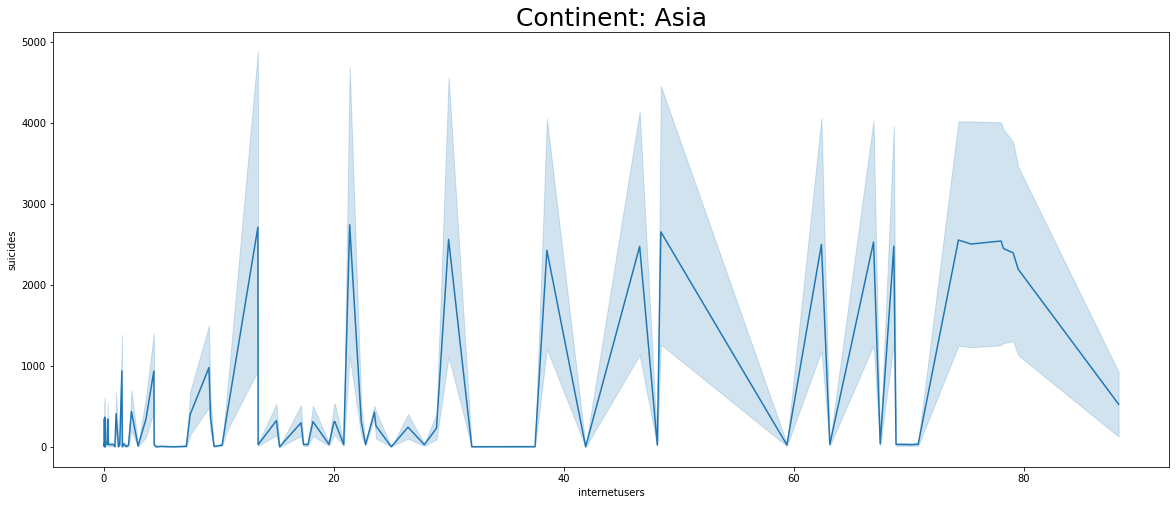

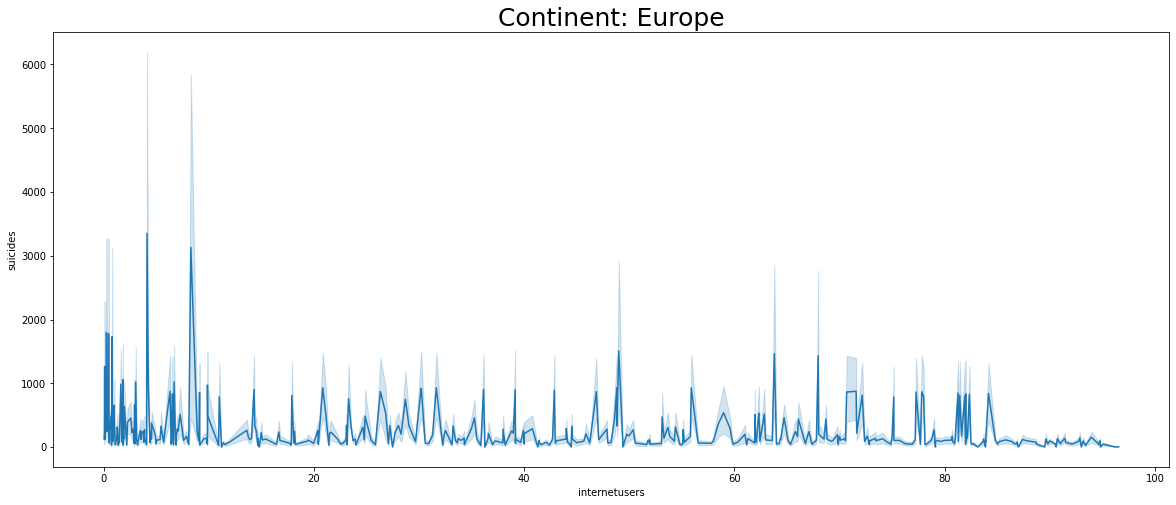

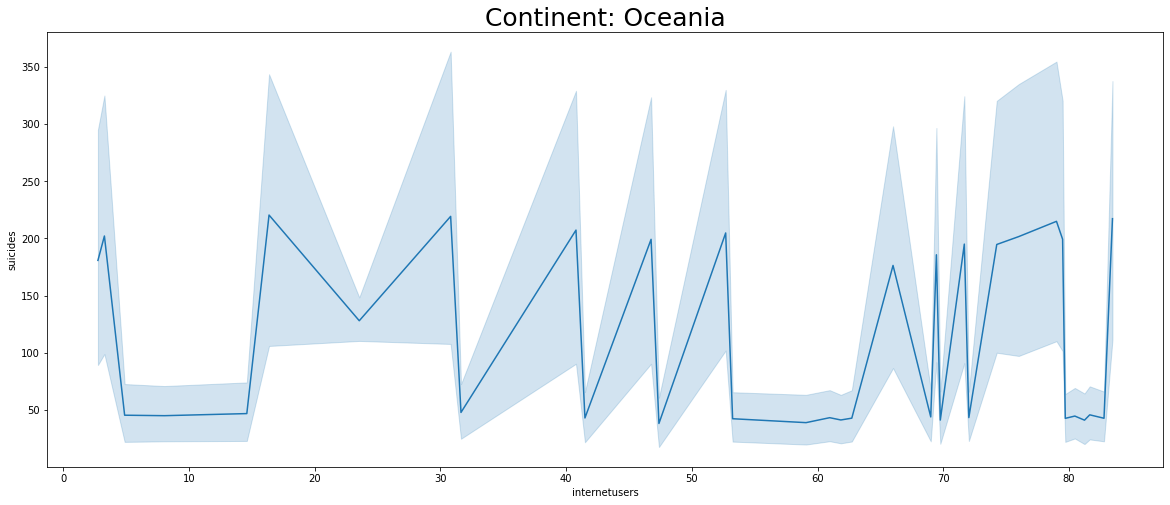

In [25]:
for continent in df.groupby("continent"):
  
  plt.figure(figsize=(20, 8))
  plt.title("Continent: "+ continent[0], fontsize = 25)
  sns.lineplot(y='suicides', x='internetusers', data=continent[1])

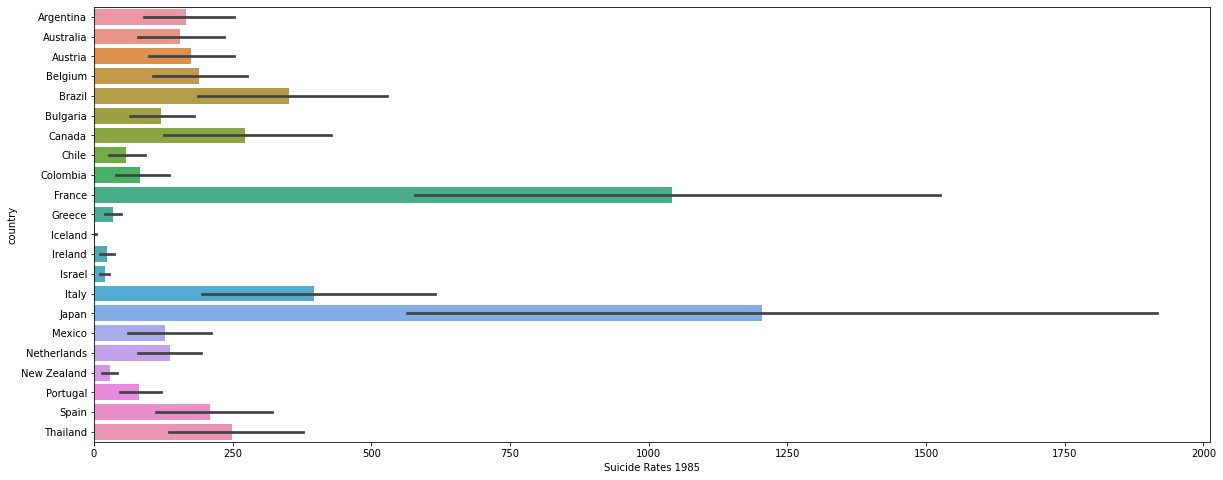

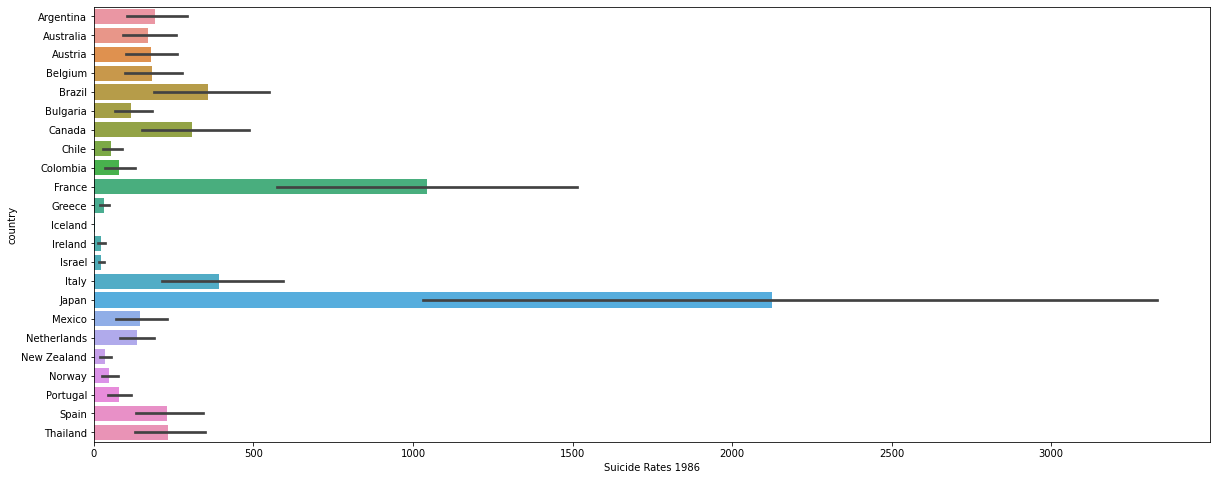

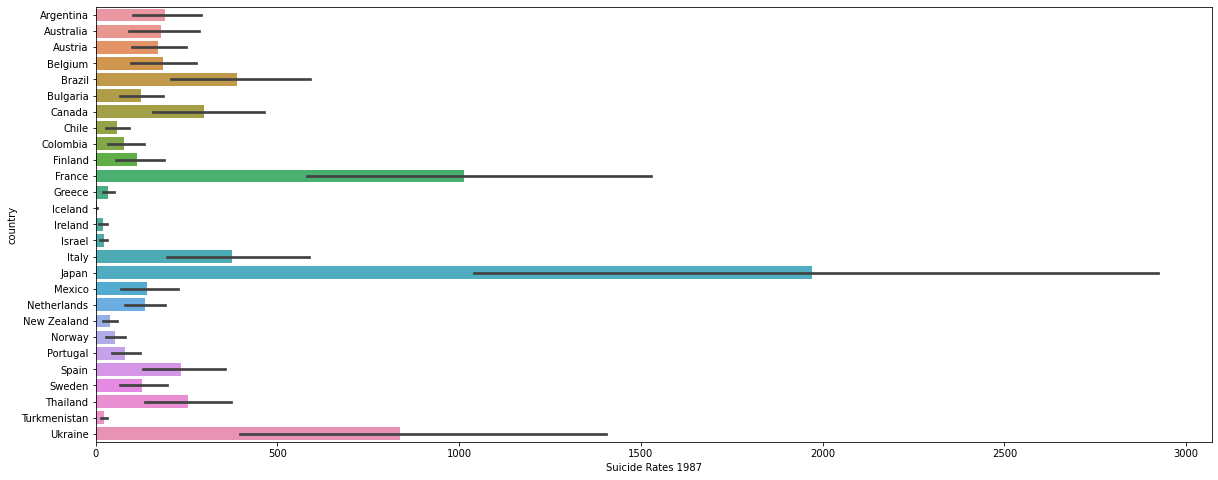

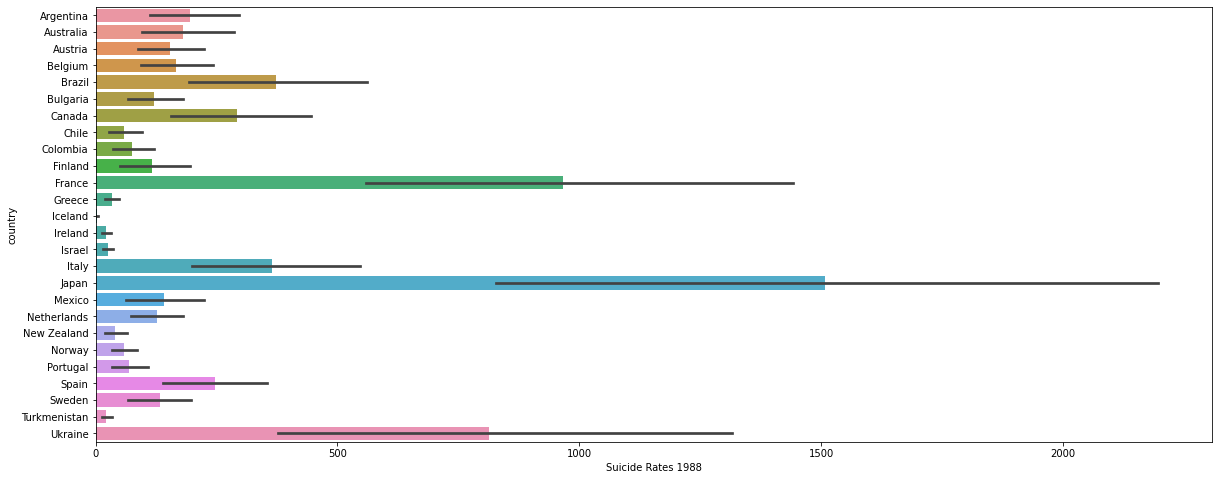

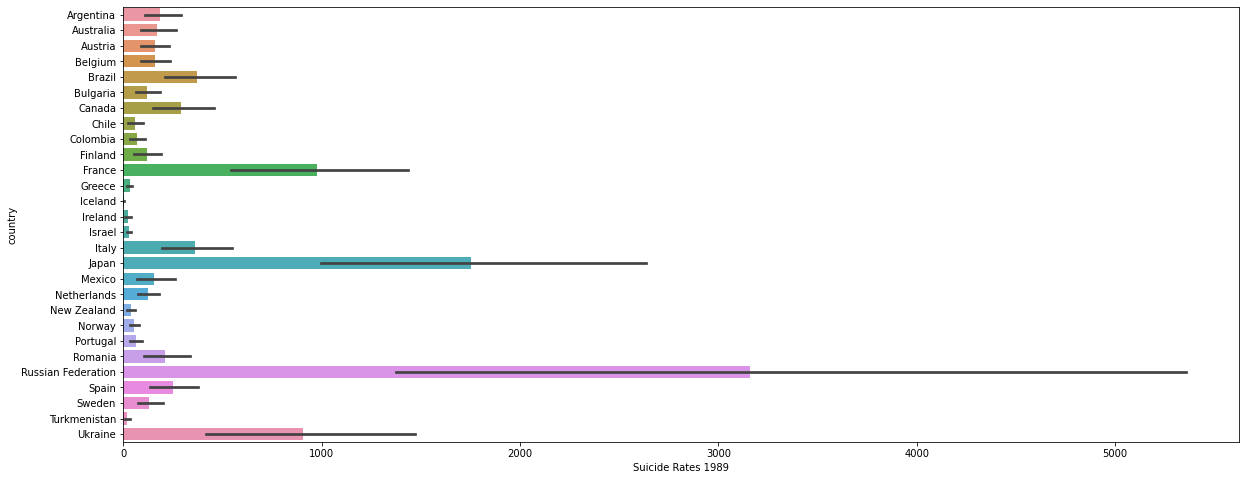

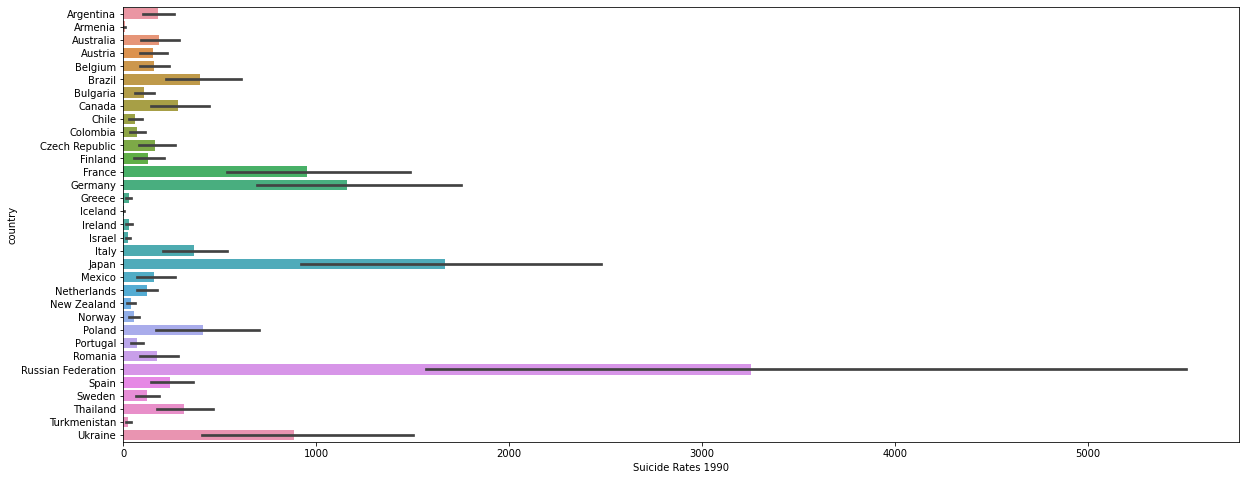

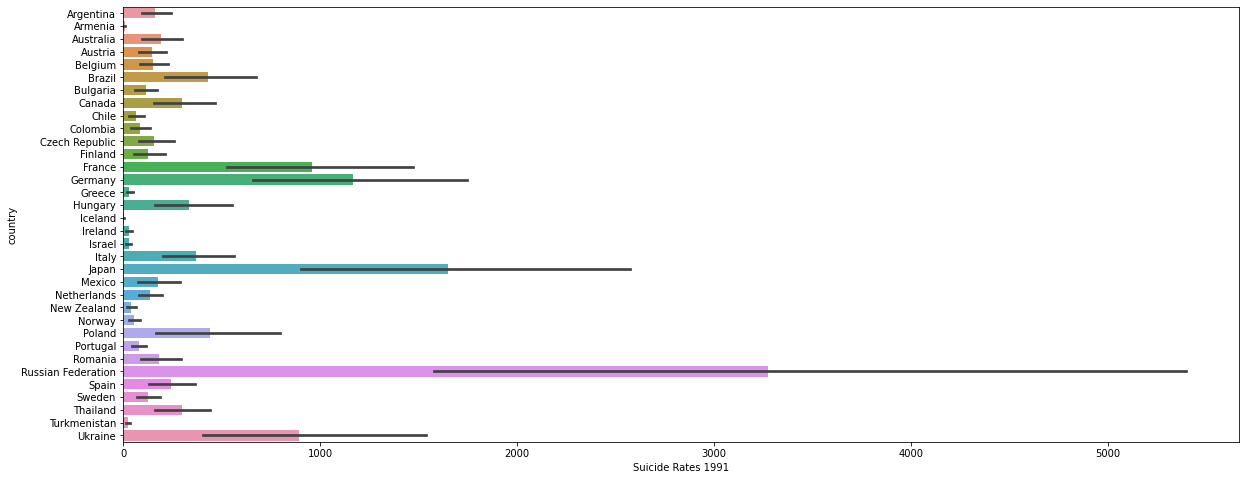

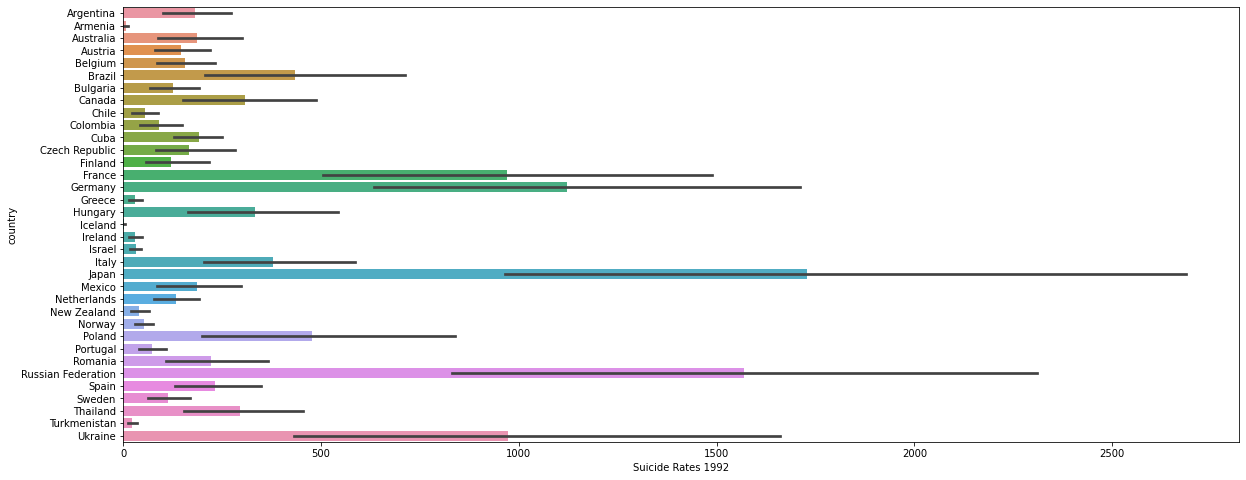

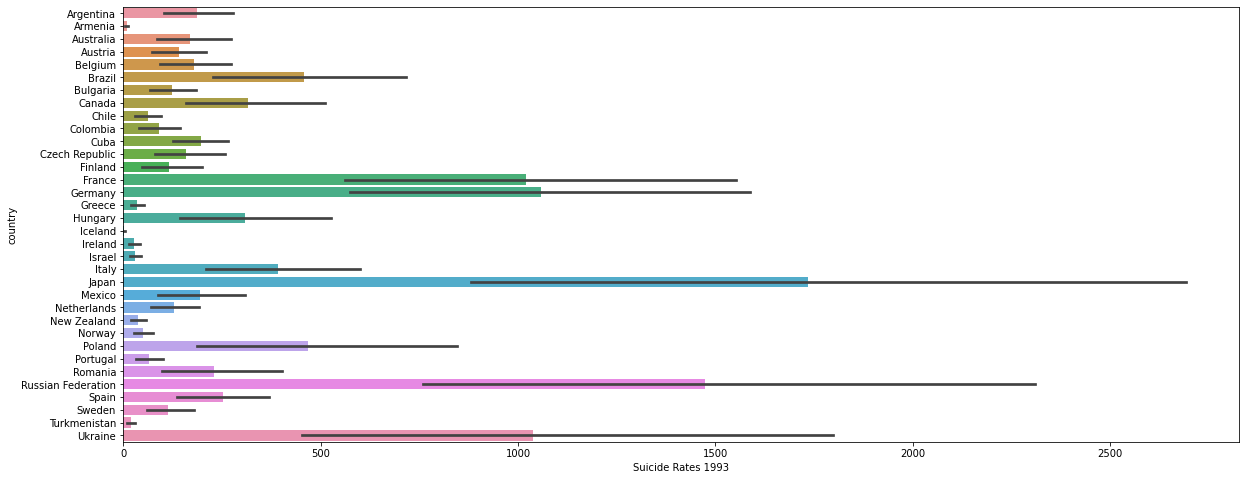

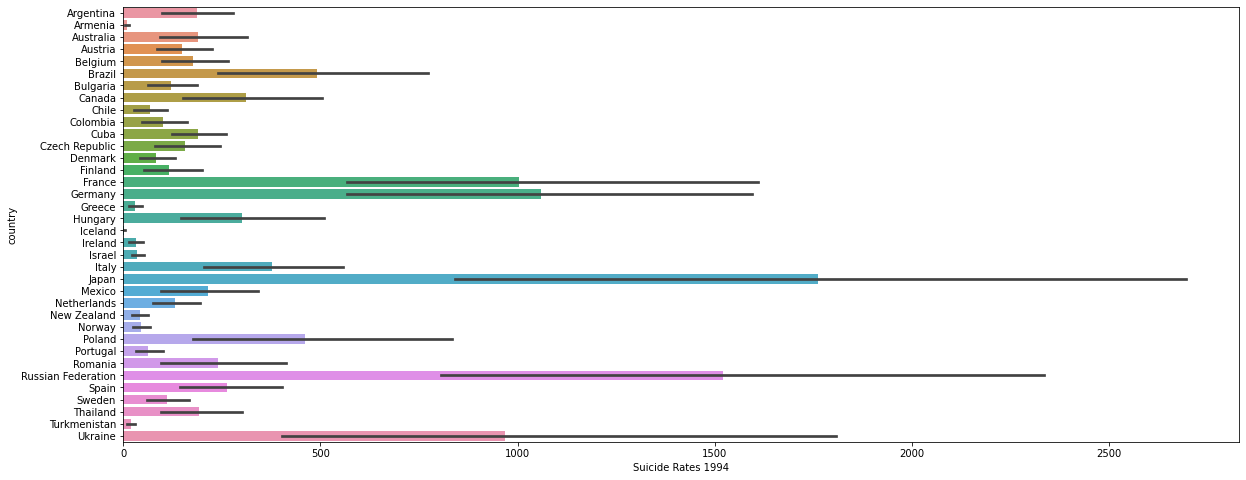

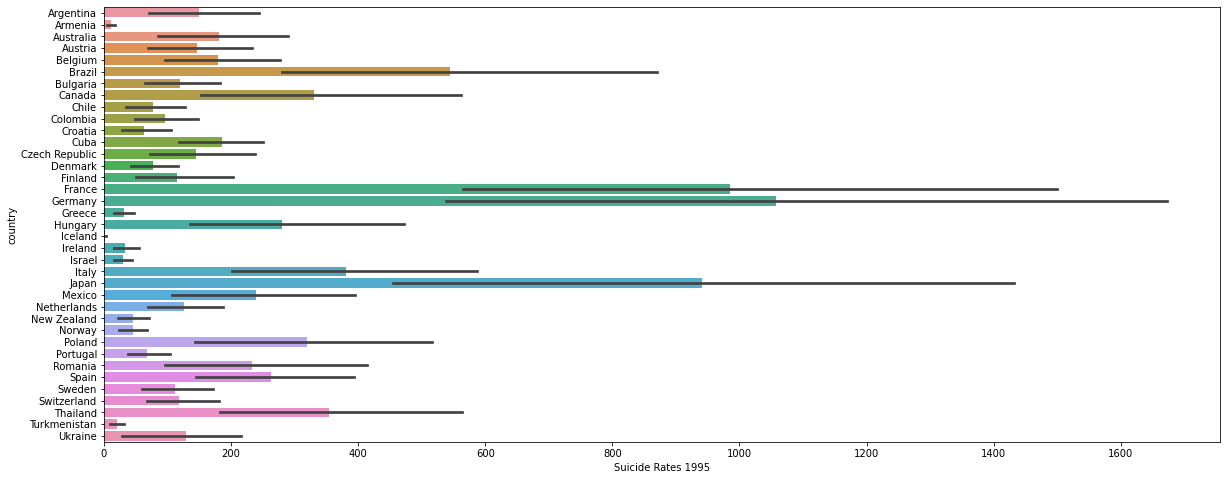

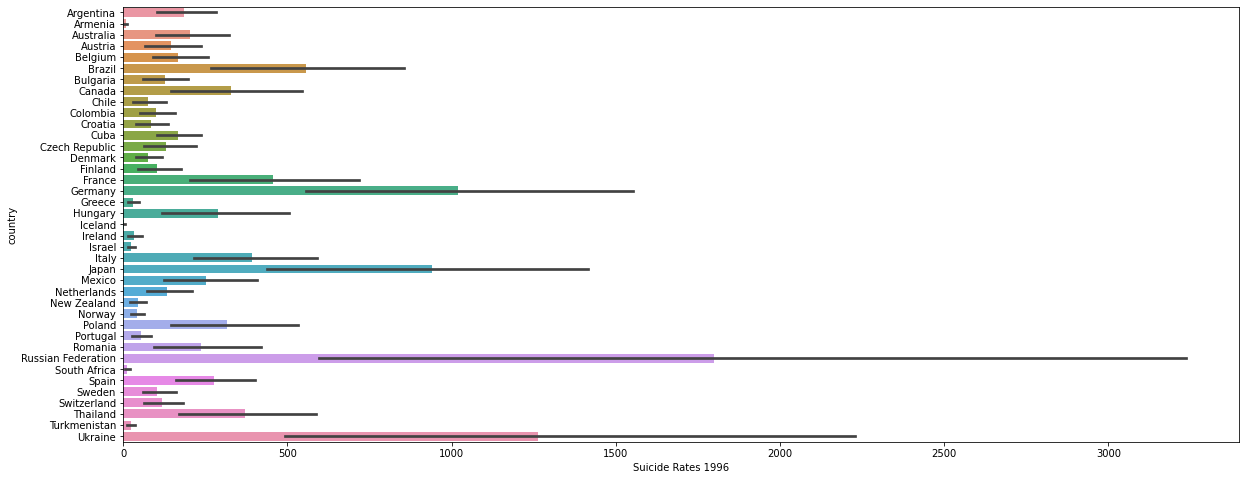

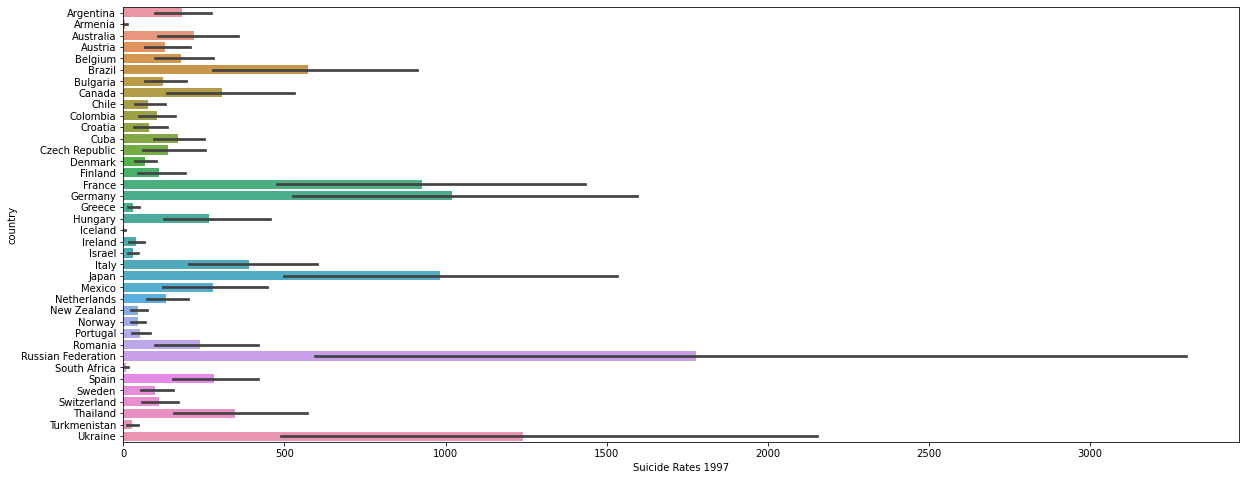

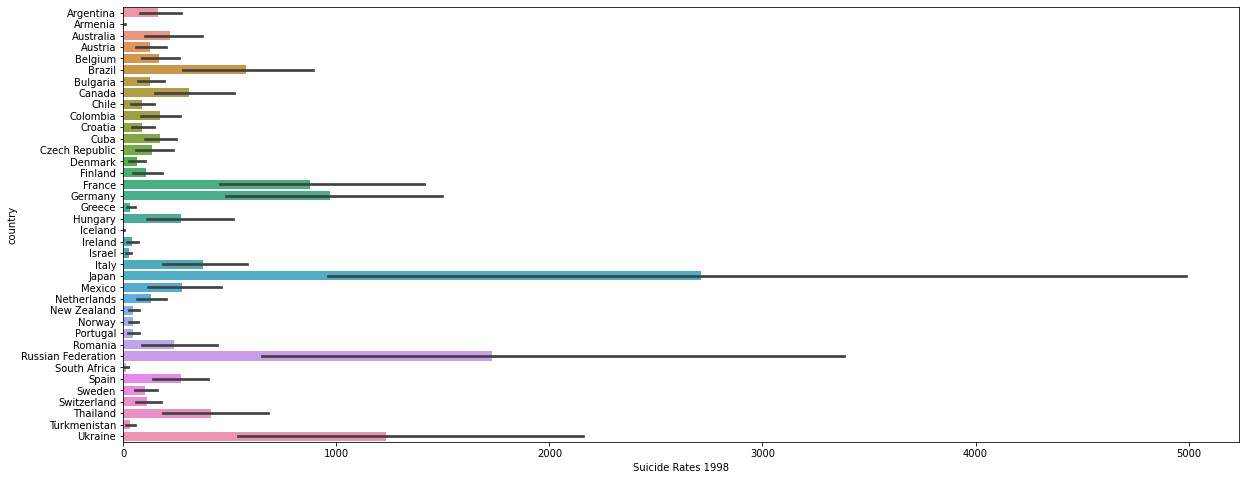

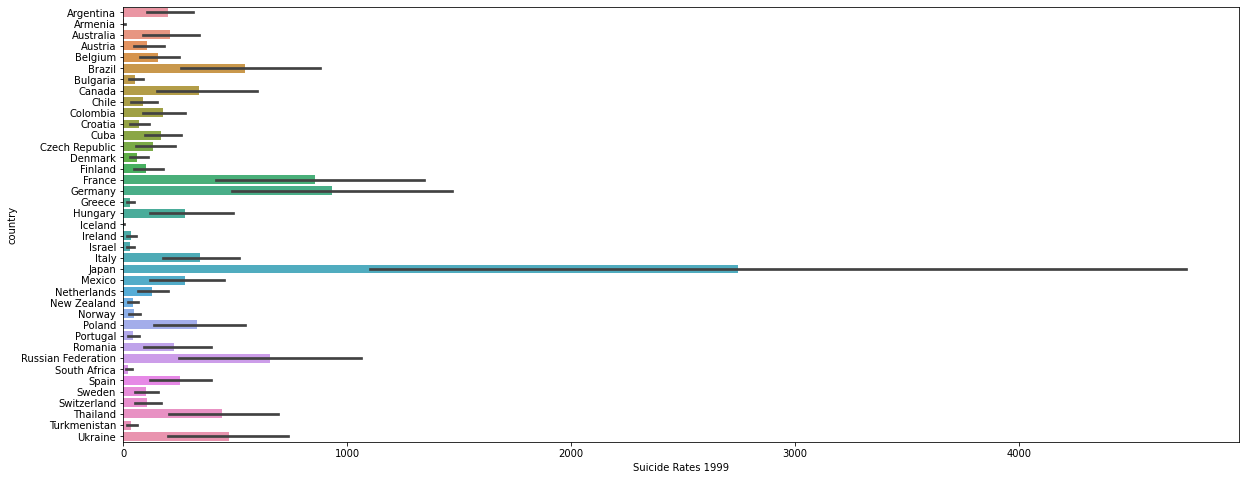

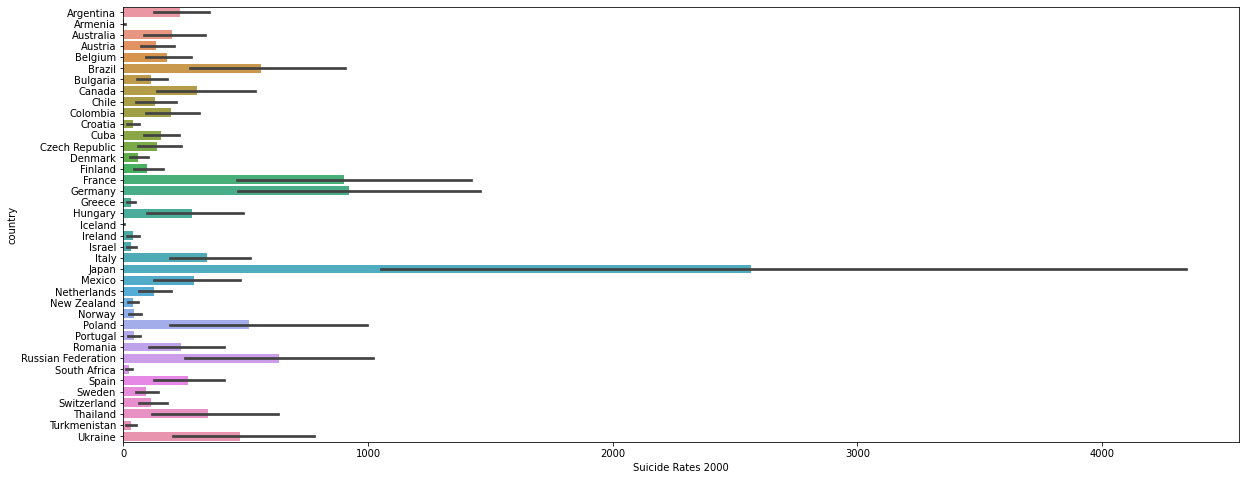

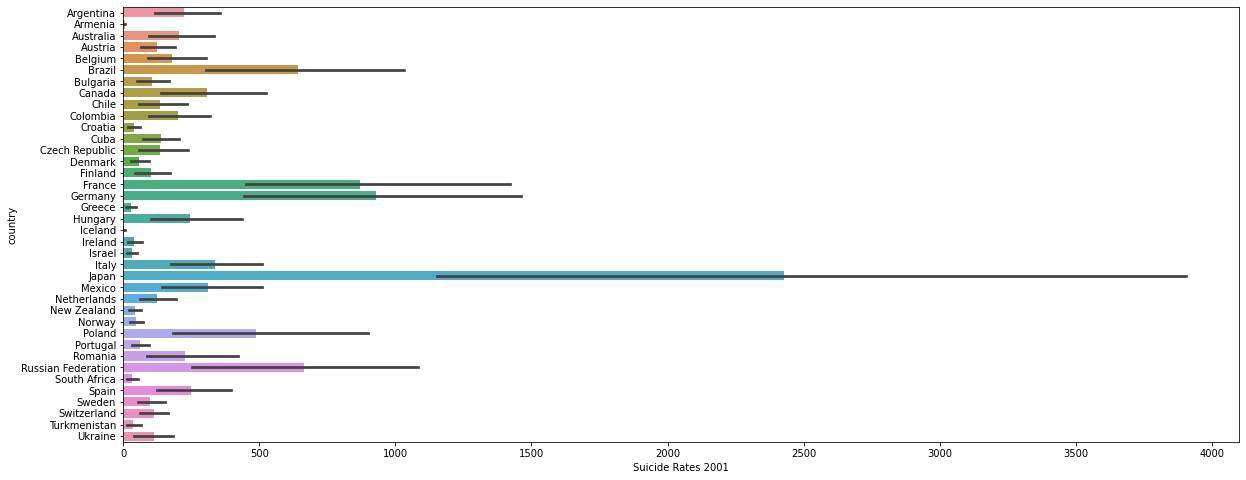

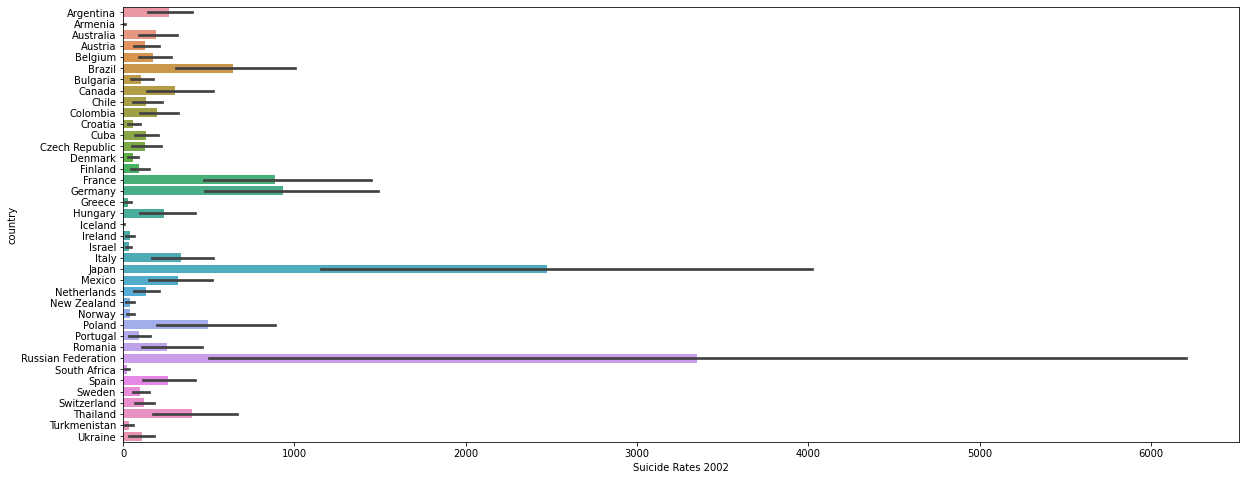

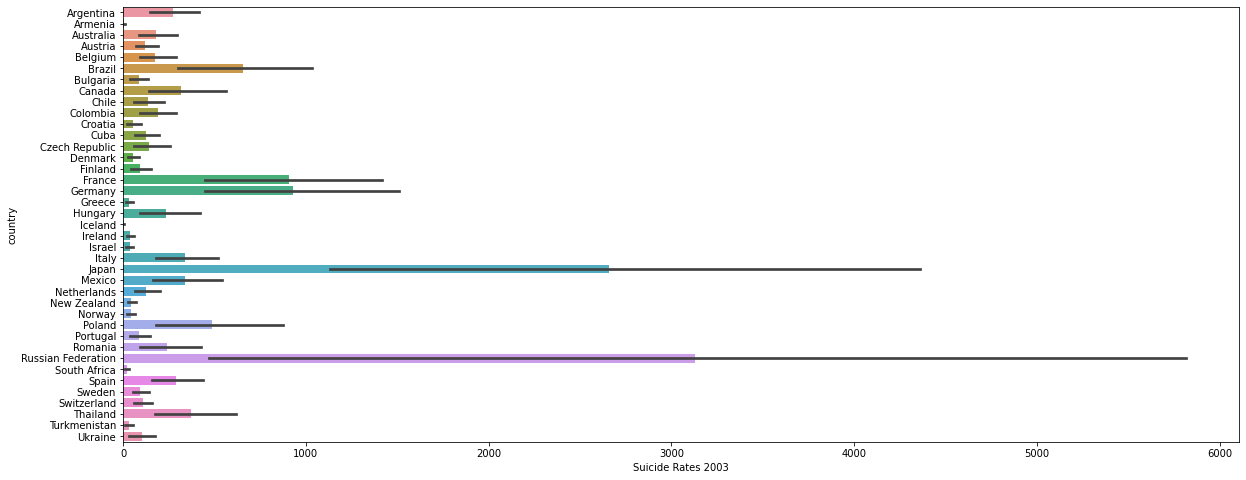

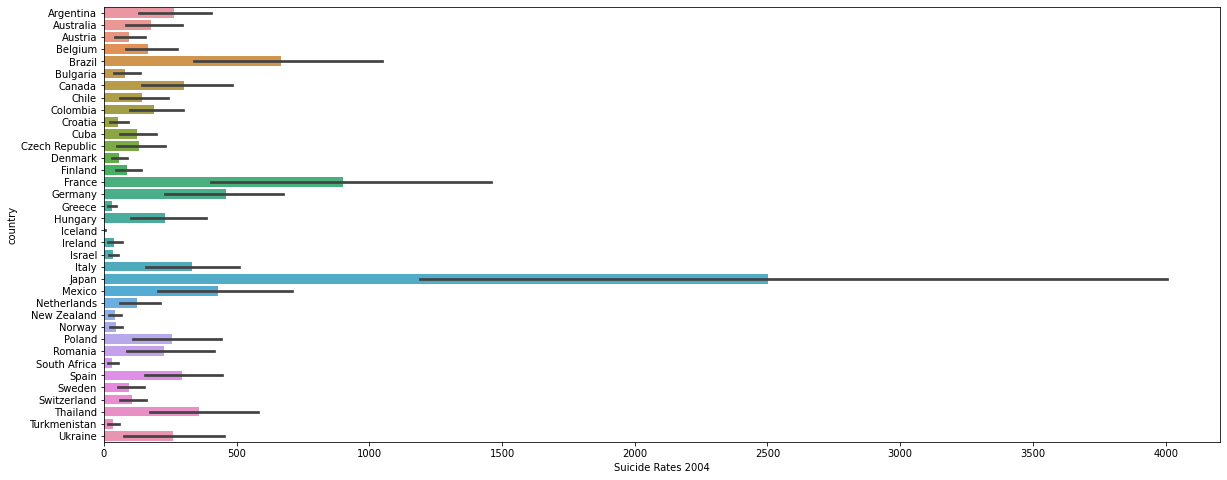

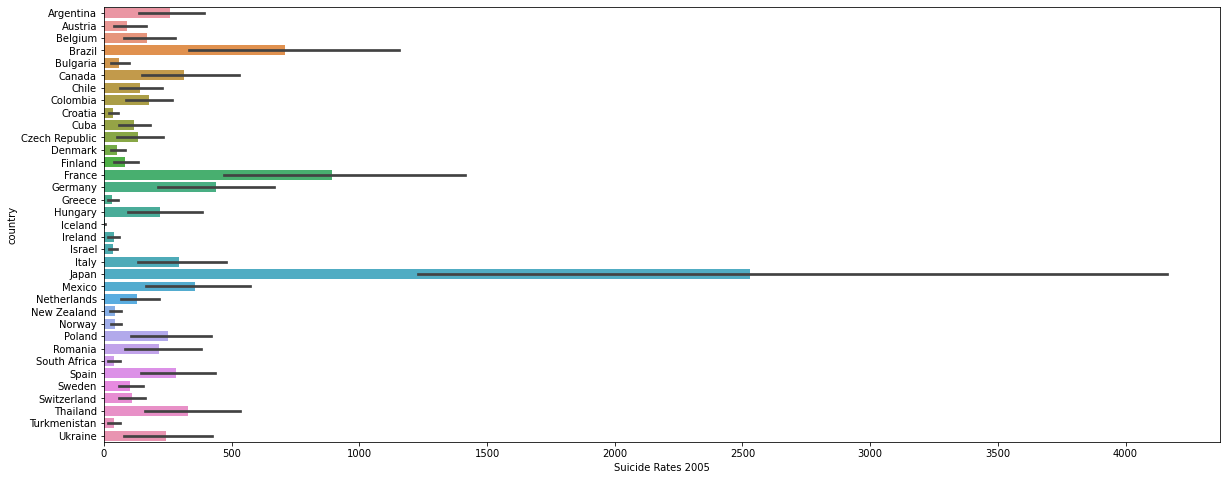

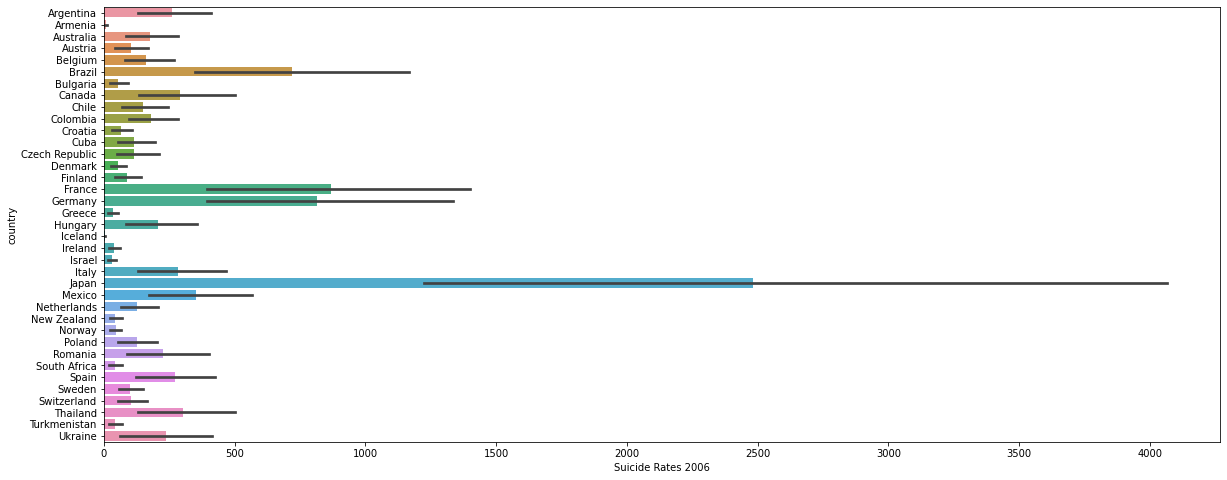

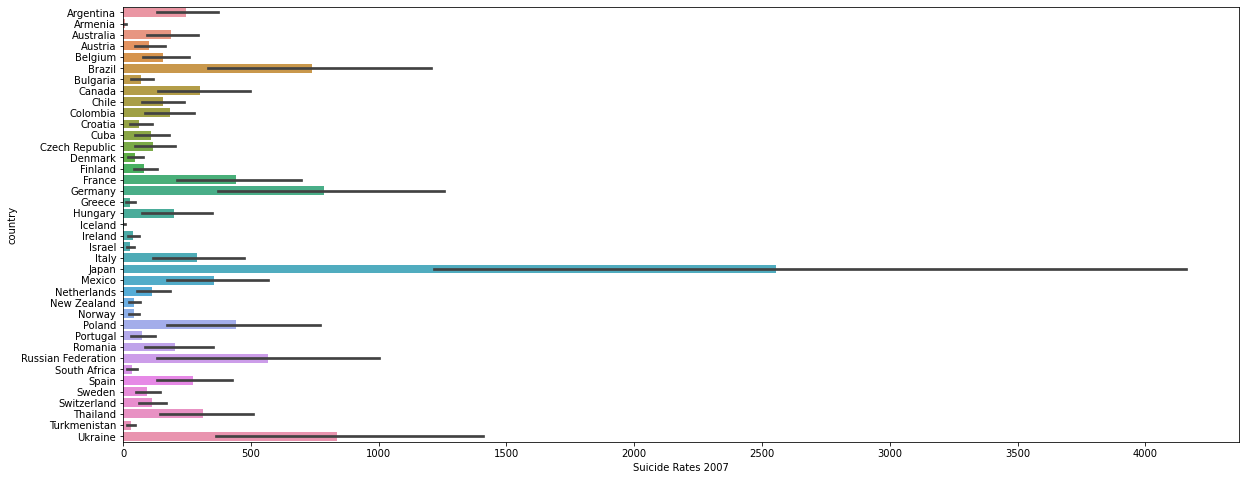

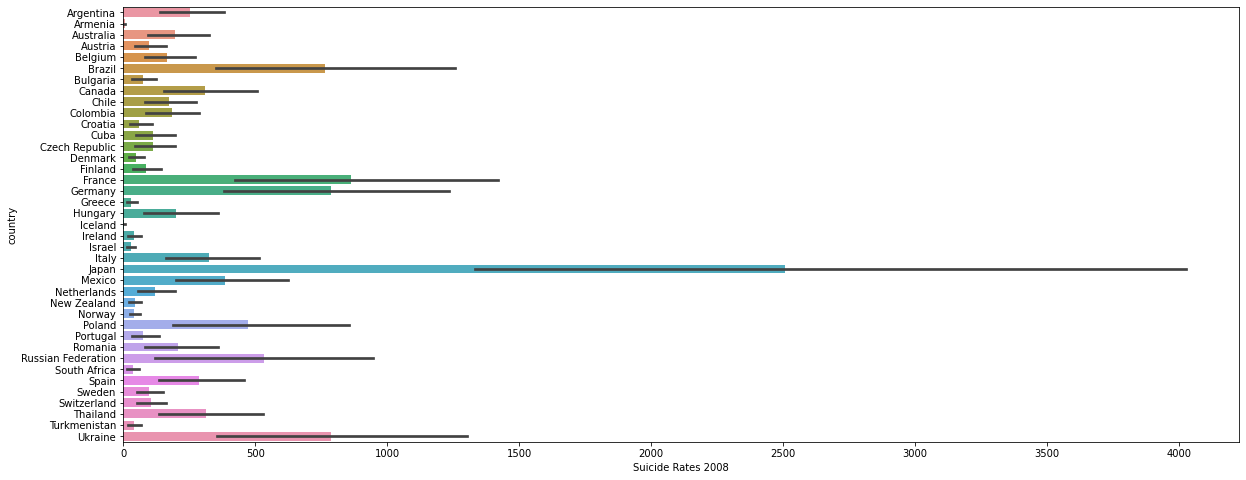

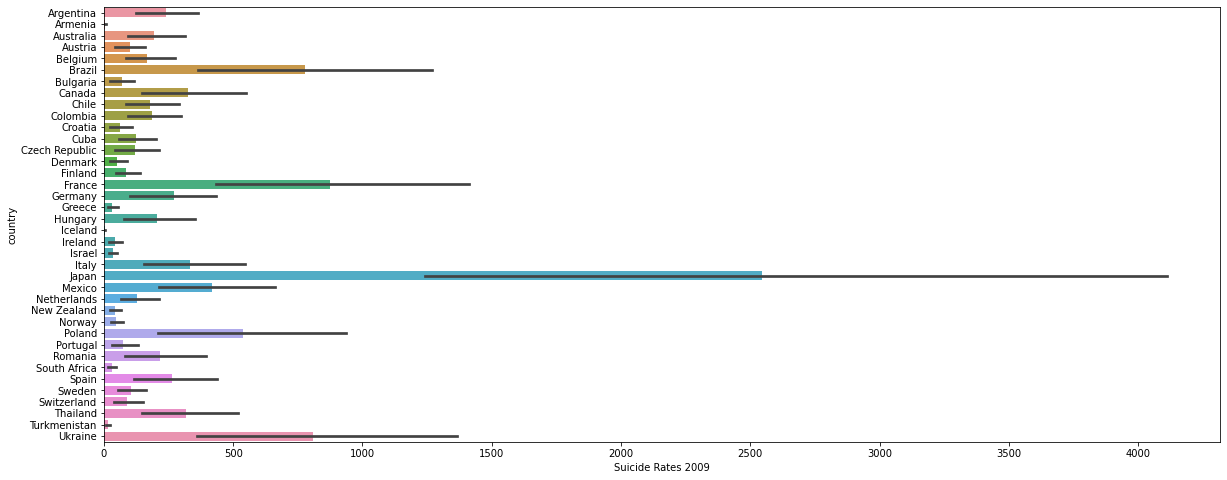

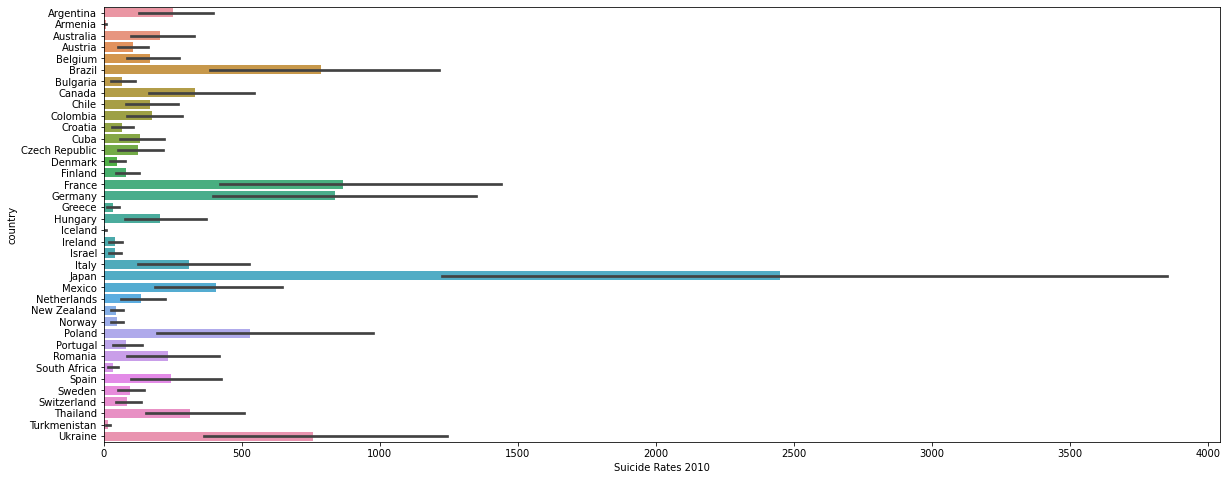

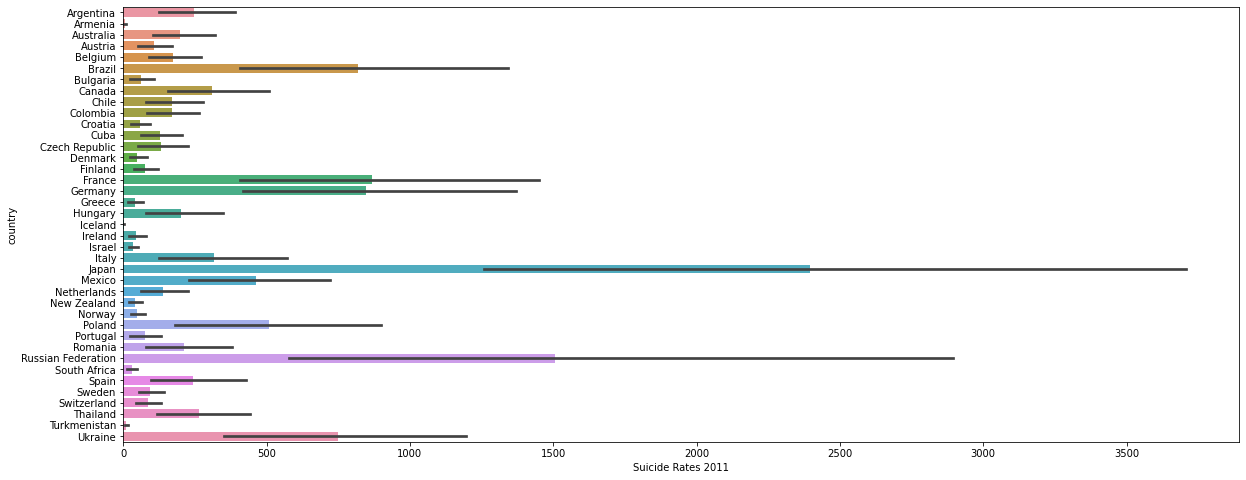

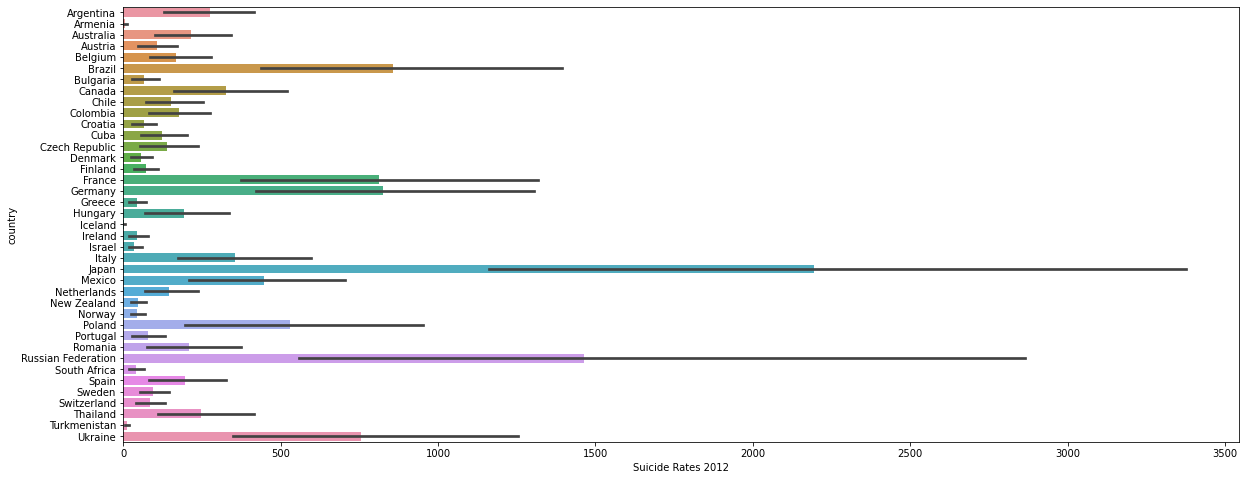

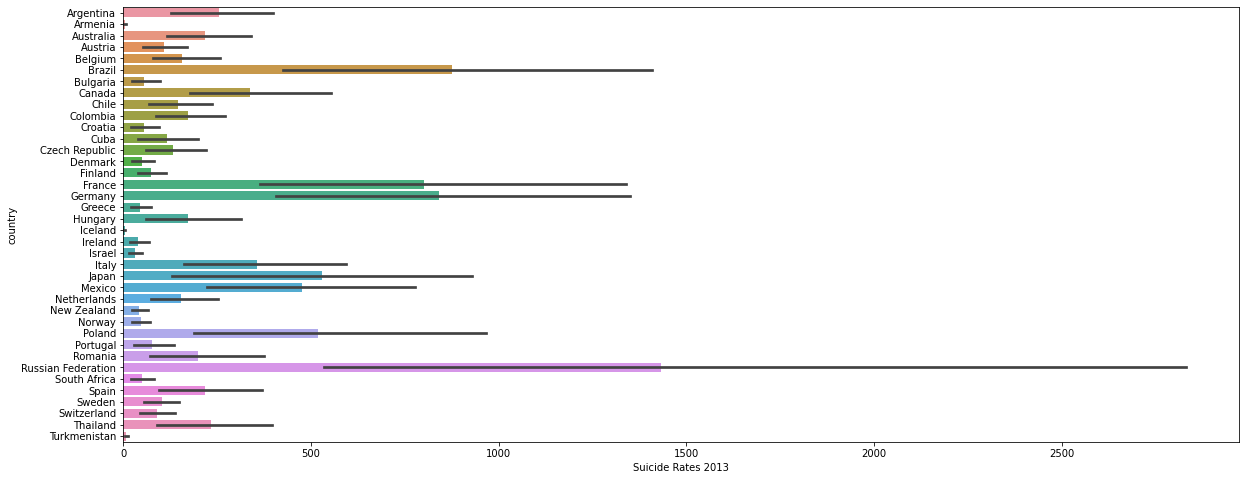

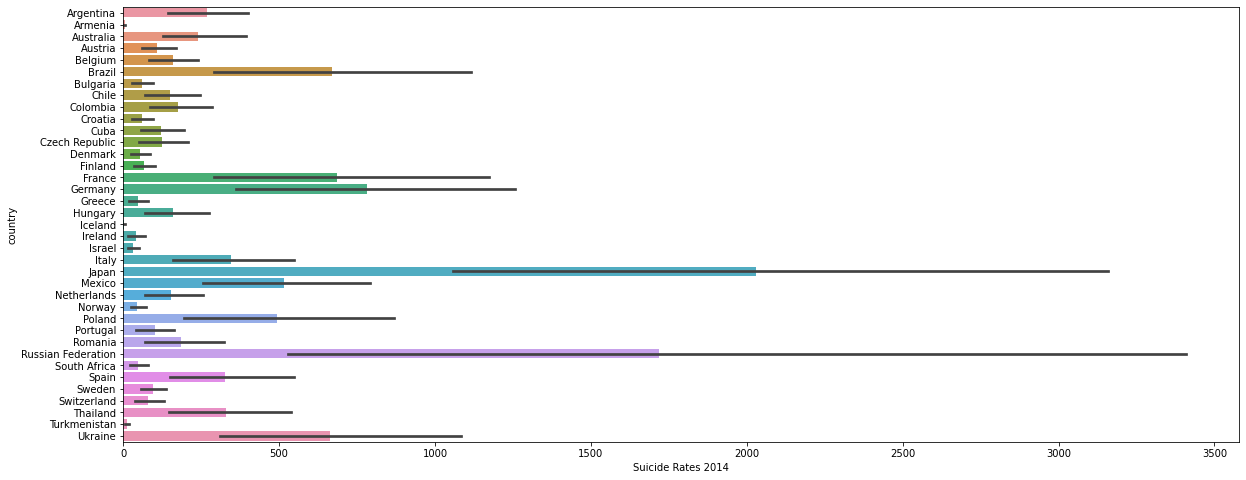

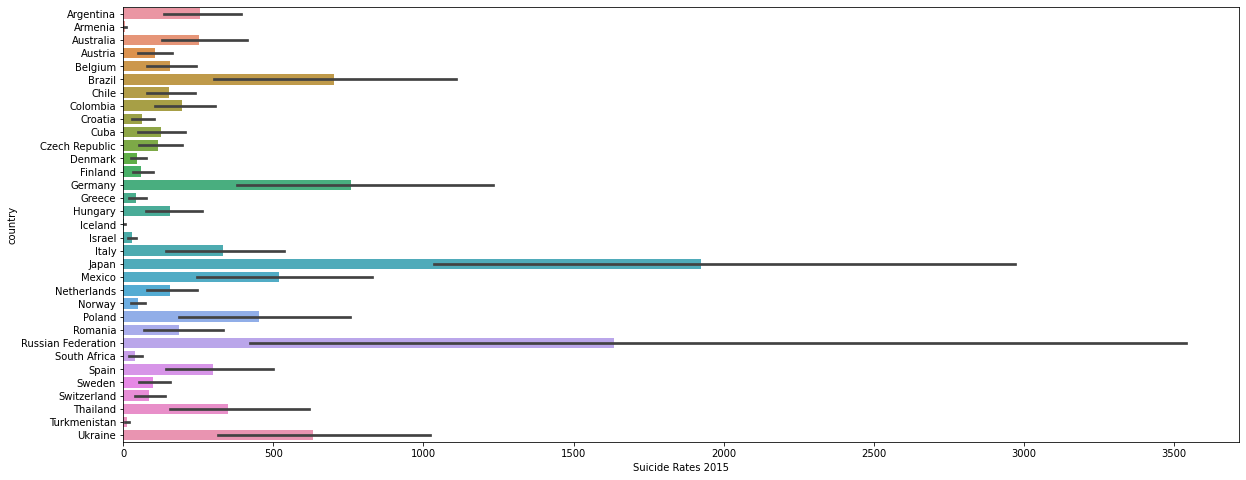

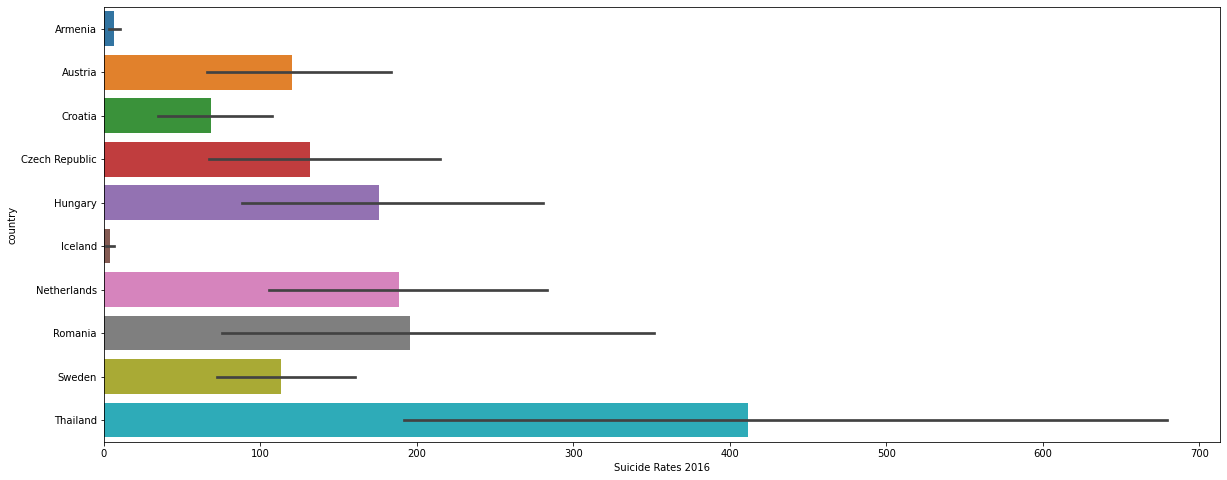

In [26]:
for year in df.groupby("year"):
    
    plt.figure(figsize=(20, 8))
    sns.barplot(y="country", x="suicides", data=year[1])
    plt.xlabel("Suicide Rates "+ str(year[0]))
    plt.show()
    
  

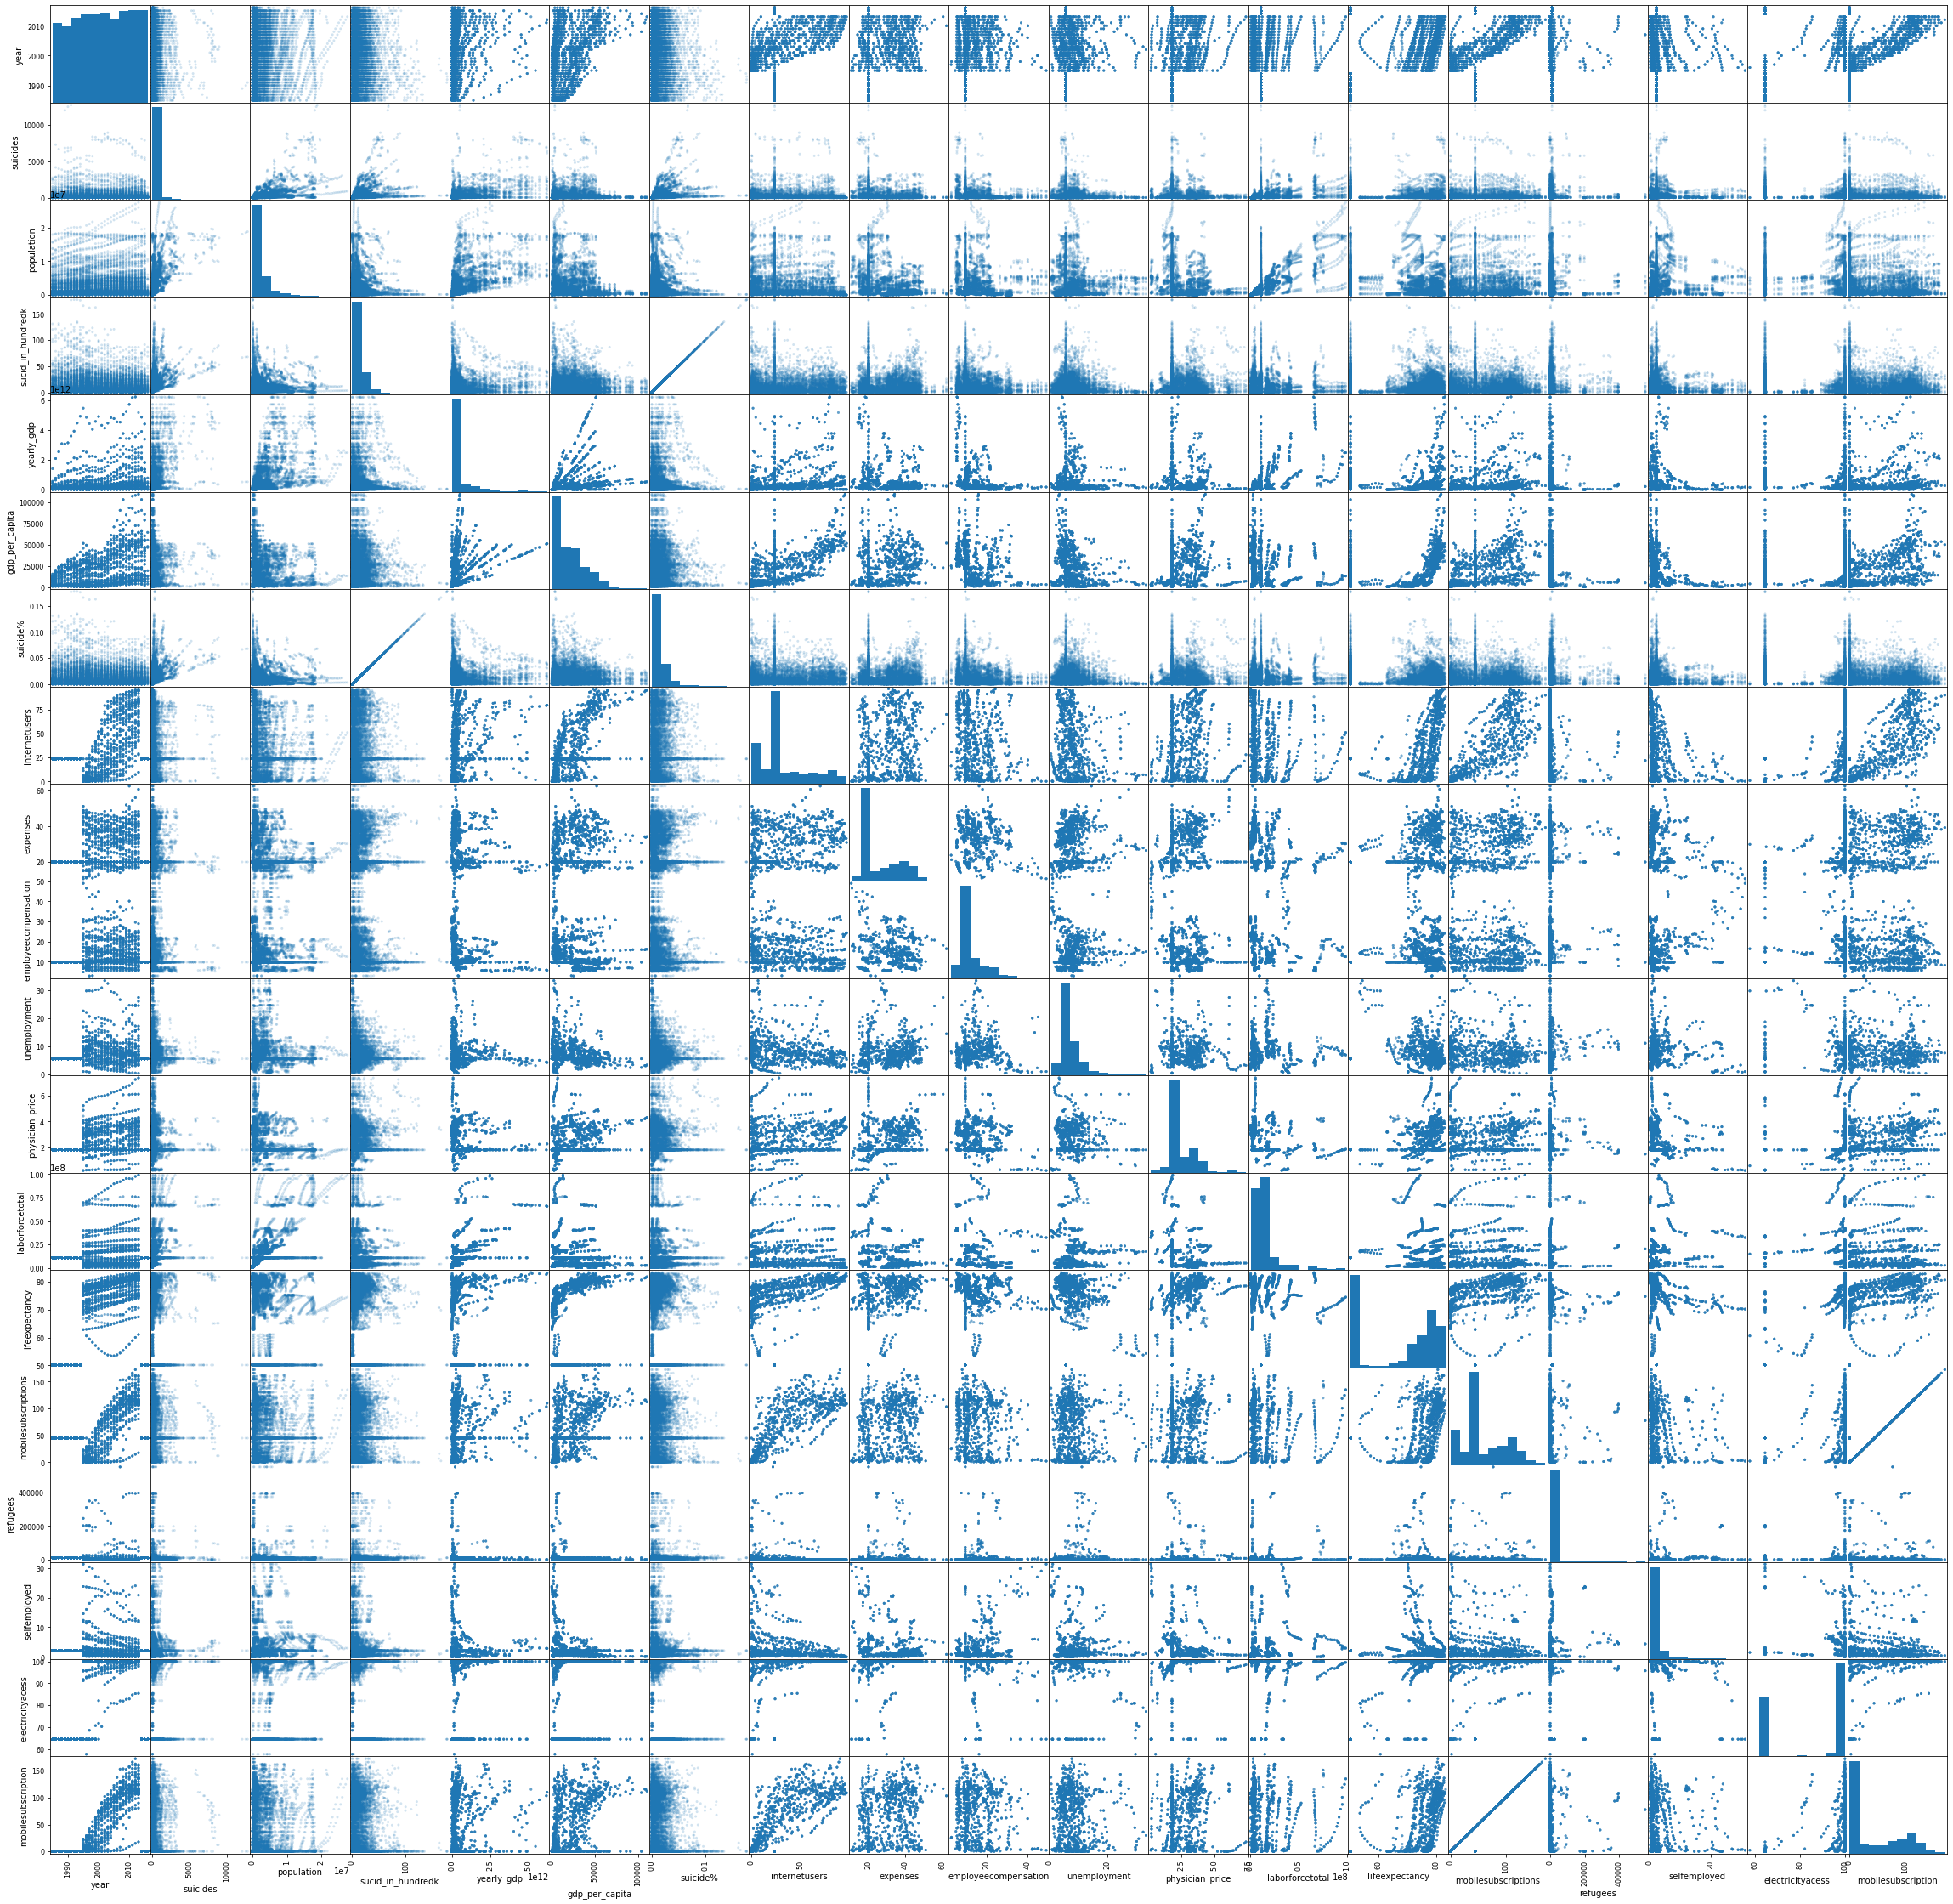

In [27]:

pd.plotting.scatter_matrix(df, alpha = 0.2, figsize=(40,40));


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



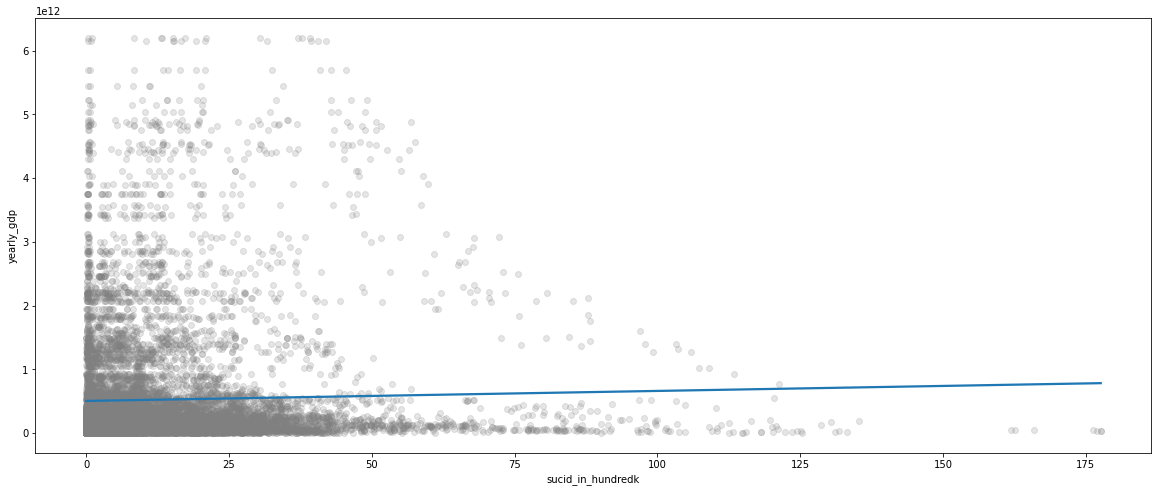

In [28]:
plt.figure(figsize=(20, 8))
sns.regplot('sucid_in_hundredk', 'yearly_gdp', ci=False, data=df,
# Lower opacity of points
scatter_kws={'alpha':0.2, 'color':'grey'} )
plt.show()

In [29]:
totalfeatures = ['country', 'year', 'sex', 'age', 'suicides', 'population',
       'sucid_in_hundredk', 'country-year', 'yearly_gdp', 'gdp_per_capita',
       'generation', 'internetusers', 'expenses', 'employeecompensation',
       'unemployment', 'physician_price', 'laborforcetotal', 'lifeexpectancy',
       'mobilesubscriptions', 'refugees', 'selfemployed', 'electricityacess',
       'continent', 'country_code', 'mobilesubscription']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



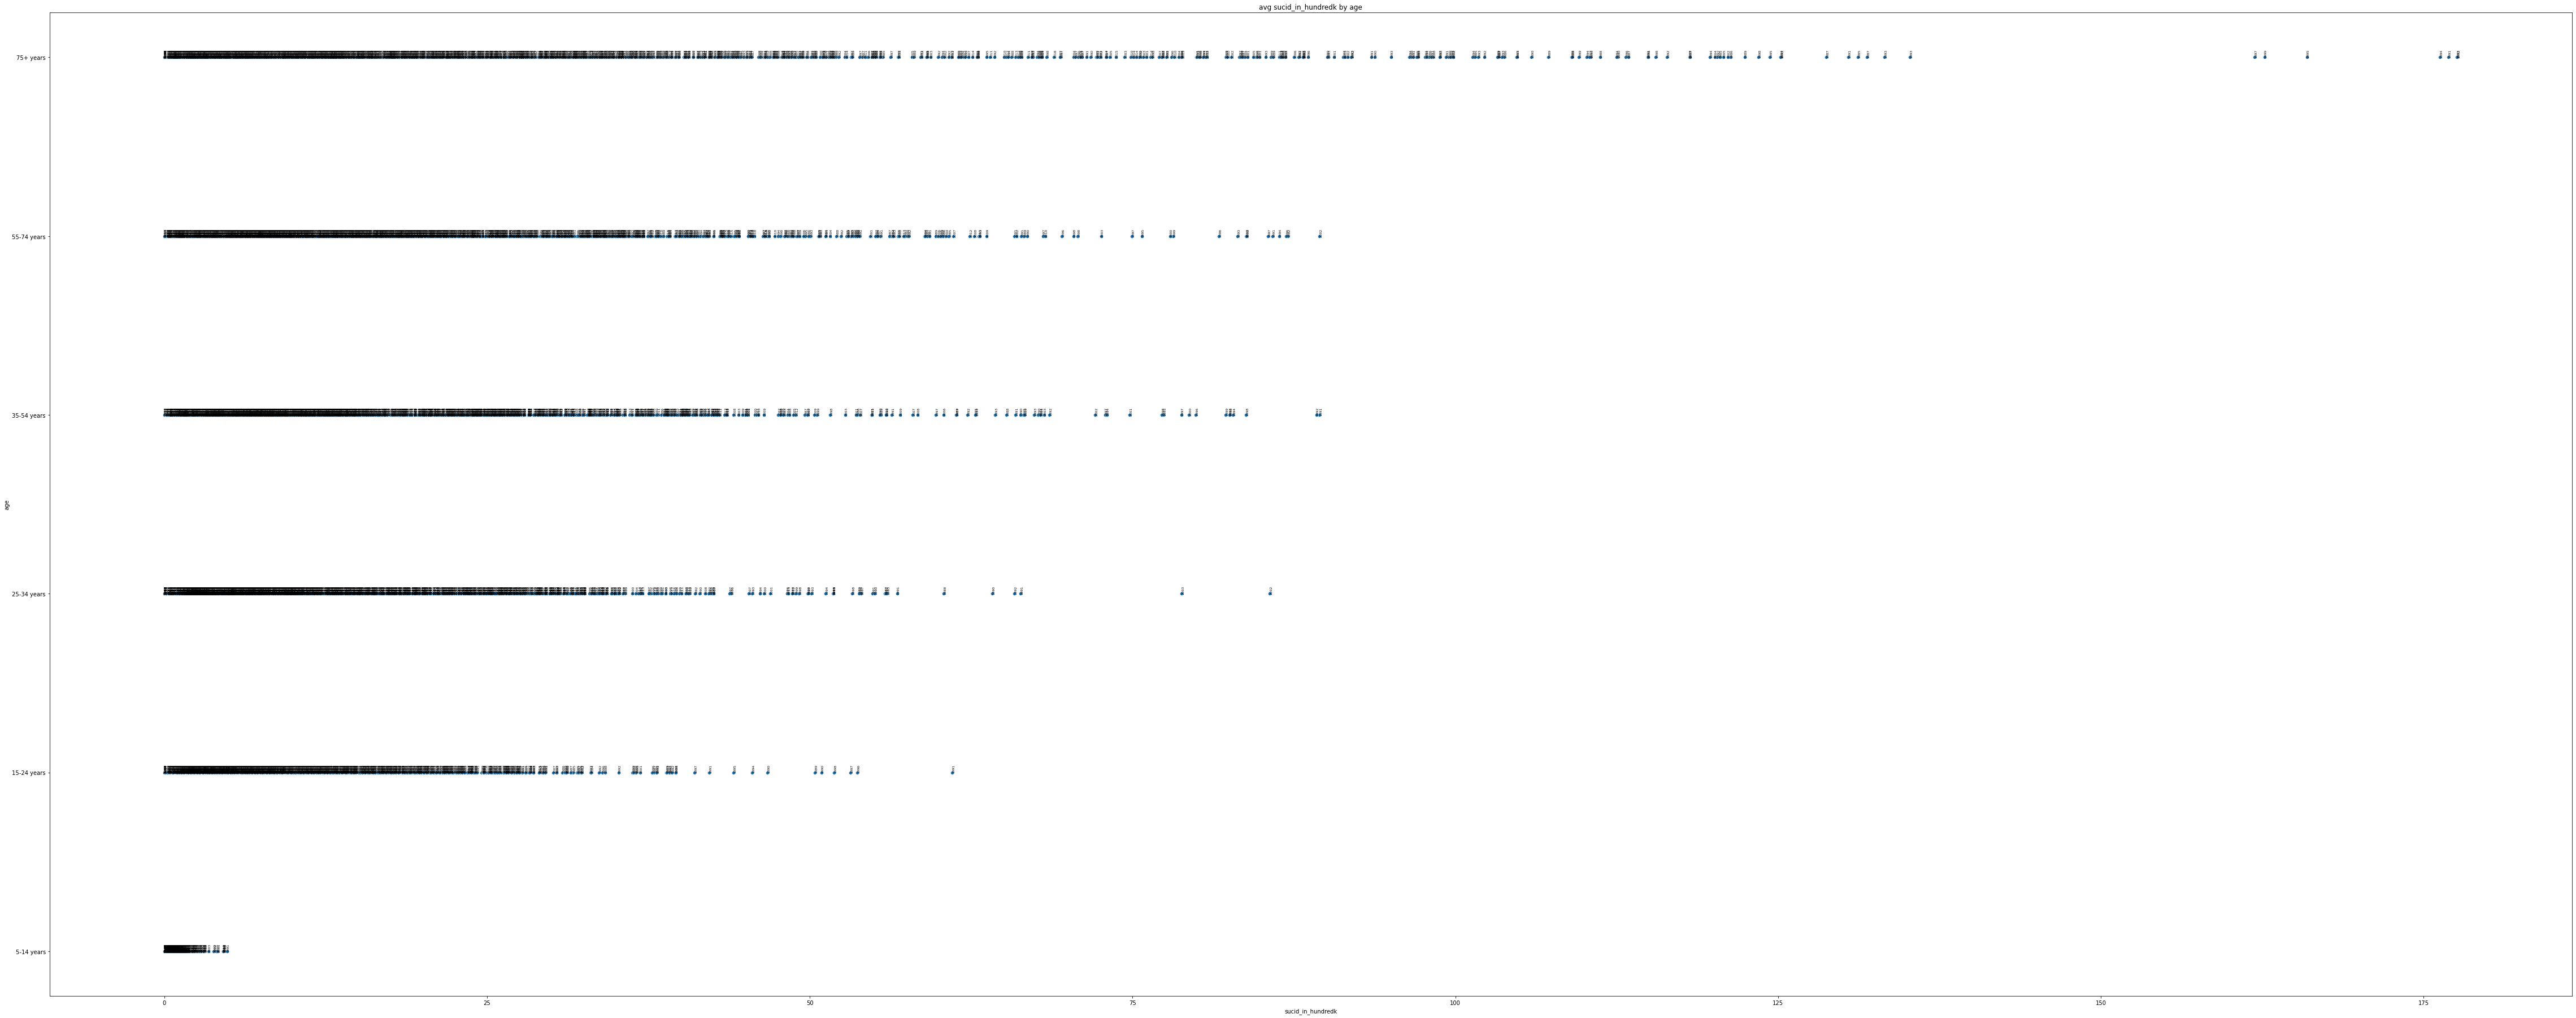

In [30]:
plt.figure(figsize=(80, 32))
g = sns.scatterplot("sucid_in_hundredk","age", data=df)
# Iterate over the rows of our data
for _, row in df.iterrows():
    # Unpack columns from row
    year = row['year']
    sucid_in_hundredk = row['sucid_in_hundredk']
    age = row['age']
    # Draw annotation in correct place
    g.annotate(year, (sucid_in_hundredk,age),fontsize=6, rotation = 90)
plt.title('avg sucid_in_hundredk by age')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



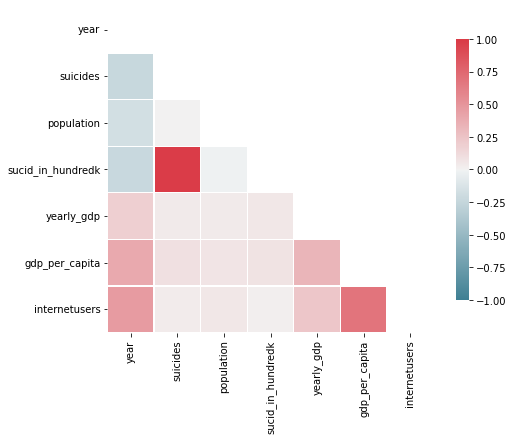

In [31]:
corr = total.corr()

# Generate a mask for the upper triangle

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 6))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=0.2, cbar_kws={"shrink": 0.8});